<a href="https://colab.research.google.com/github/armanalam6342/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<b> Installing modules

In [289]:
#install xbgoost
!pip install xgboost
#install lime and Shap
!pip install lime
!pip install shap
!pip install eli5
#install dtreeviz for visualizing decision tree
!pip install dtreeviz

##<b> Import Modules

In [290]:
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Import Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc

# Imports for visualizing Decision Tree
from sklearn.datasets import*
from sklearn.tree import*
from IPython.display import Image,display_svg,SVG
from dtreeviz.trees import dtreeviz
from sklearn import tree
from dtreeviz.trees import *

# Importing model explainability
import lime
from lime import lime_tabular
import eli5 as eli
import shap

## <b> Loading the dataset

In [291]:
data = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls')


In [292]:
# Copy data for backup
df = data.copy()

In [293]:
# Checking top 5 rows of the data
df.head()

Unnamed: 0         X1   X2  ...       X22       X23                           Y
0         ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
1          1      20000    2  ...         0         0                           1
2          2     120000    2  ...         0      2000                           1
3          3      90000    2  ...      1000      5000                           0
4          4      50000    2  ...      1069      1000                           0

[5 rows x 25 columns]

#<b> Preprocessing

In [294]:
# Droping 'Unnamed: 0' column 
df.drop(columns='Unnamed: 0',inplace=True)

In [295]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [296]:
 # replace column name with columns list
df.set_axis(columns, axis=1, inplace=True)

In [297]:
# droping the axis 0
df=df.drop(0,axis=0).reset_index(drop=True)

In [298]:
df.head()

Limit_bal Gender Education  ... Pay_May Pay_April Defaulter
0     20000      2         2  ...       0         0         1
1    120000      2         2  ...       0      2000         1
2     90000      2         2  ...    1000      5000         0
3     50000      2         2  ...    1069      1000         0
4     50000      1         2  ...     689       679         0

[5 rows x 24 columns]

In [299]:
# Checking the shape of data
df.shape

(30000, 24)

In [300]:
# checking information about each column, but all columns dtype is in object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Limit_bal            30000 non-null  object
 1   Gender               30000 non-null  object
 2   Education            30000 non-null  object
 3   Marital_status       30000 non-null  object
 4   Age                  30000 non-null  object
 5   Repayment_September  30000 non-null  object
 6   Repayment_August     30000 non-null  object
 7   Repayment_July       30000 non-null  object
 8   Repayment_June       30000 non-null  object
 9   Repayment_May        30000 non-null  object
 10  Repayment_April      30000 non-null  object
 11  Sep_Bill             30000 non-null  object
 12  Aug_Bill             30000 non-null  object
 13  July_Bill            30000 non-null  object
 14  June_Bill            30000 non-null  object
 15  May_Bill             30000 non-null  object
 16  Apr_

In [301]:
# Converting all columns from Object to int 
for i in df.columns:
  df[i]=df[i].astype('int')

In [302]:
# Describing data set
df.describe()

Limit_bal        Gender  ...      Pay_April     Defaulter
count    30000.000000  30000.000000  ...   30000.000000  30000.000000
mean    167484.322667      1.603733  ...    5215.502567      0.221200
std     129747.661567      0.489129  ...   17777.465775      0.415062
min      10000.000000      1.000000  ...       0.000000      0.000000
25%      50000.000000      1.000000  ...     117.750000      0.000000
50%     140000.000000      2.000000  ...    1500.000000      0.000000
75%     240000.000000      2.000000  ...    4000.000000      0.000000
max    1000000.000000      2.000000  ...  528666.000000      1.000000

[8 rows x 24 columns]

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [303]:
# Checking duplicates in the data
# we have duplicates of non defaulter - 29 and defaulter 6
duplicates = df[df.duplicated()]
duplicates.Defaulter.value_counts()

0    29
1     6
Name: Defaulter, dtype: int64

In [304]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [305]:
# Checking null values. So we don't have any missing values
df.isnull().sum()

Limit_bal              0
Gender                 0
Education              0
Marital_status         0
Age                    0
Repayment_September    0
Repayment_August       0
Repayment_July         0
Repayment_June         0
Repayment_May          0
Repayment_April        0
Sep_Bill               0
Aug_Bill               0
July_Bill              0
June_Bill              0
May_Bill               0
Apr_Bill               0
Pay_Sep                0
Pay_Aug                0
Pay_July               0
Pay_June               0
Pay_May                0
Pay_April              0
Defaulter              0
dtype: int64

So we don't have any missing value

In [306]:
# Divide data from its basic feature 
cat_df = df[['Age','Gender','Education','Marital_status']]
repayment_df =df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]

#<b> Feature Engineering

## Categorical Features

In [307]:
# Value count of Gender Column
df.Gender.value_counts()

2    18091
1    11874
Name: Gender, dtype: int64

In [308]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
df['Gender'] = df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

In [309]:
# Value count of Education Column
df.Education.value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others

In [310]:
# In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others
df['Education']=df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

In [311]:
# Value count of Marital_status Column
df.Marital_status.value_counts()

2    15945
1    13643
3      323
0       54
Name: Marital_status, dtype: int64

data given values are 1 = married; 2 = single; 3 = others so 0 is  not given in data, we include them on others

In [312]:
# data given values are 1 = married; 2 = single; 3 = others so 0 is  not given in data, we include them on others
df['Marital_status']=df['Marital_status'].apply(lambda x : "married" if x==1 else ("single" if x==2 else 'others'))

In [313]:
# Value count percentage of Age Column
df.Age.value_counts(normalize=True)

29    0.053462
27    0.049224
28    0.046921
30    0.046521
26    0.041782
31    0.040481
25    0.039546
34    0.038745
32    0.038612
33    0.038245
24    0.037577
35    0.037143
36    0.036943
37    0.034741
39    0.031737
38    0.031470
23    0.031036
40    0.029034
41    0.027432
42    0.026431
44    0.023361
43    0.022326
45    0.020591
46    0.019022
22    0.018688
47    0.016720
48    0.015551
49    0.014984
50    0.013716
51    0.011347
53    0.010846
52    0.010145
54    0.008243
55    0.006975
56    0.005940
58    0.004071
57    0.004071
59    0.002770
60    0.002236
21    0.002236
61    0.001869
62    0.001468
63    0.001035
64    0.001035
66    0.000834
65    0.000801
67    0.000534
69    0.000501
70    0.000334
68    0.000167
73    0.000133
71    0.000100
72    0.000100
75    0.000100
74    0.000033
79    0.000033
Name: Age, dtype: float64

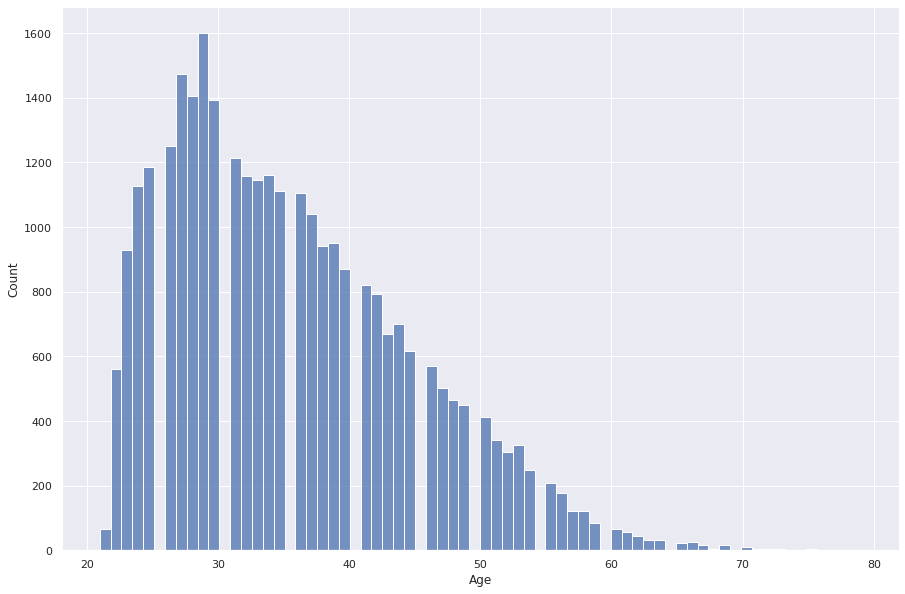

In [314]:
# visualizing the Age column for better understanding with histplot
sns.histplot(df['Age'])

From this hist plot we can divide age into 9 bins

In [315]:
# we are using Bining in Age column
df['Age_group'] = pd.cut(df.Age, bins=[21,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])
cat_df['Age_group'] = pd.cut(df.Age, bins=[21,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [316]:
# droping Age column
# df.drop(columns=['Age'],inplace=True)
cat_df.drop(columns=['Age'],inplace=True)

##<b> Repayments status columns

In [317]:
#value counts of all Repayments status Columns 
for i in repayment_df.columns:
  print('column name = ', i)
  print(repayment_df[i].value_counts())

column name =  Repayment_September
 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment_September, dtype: int64
column name =  Repayment_August
 0    15730
-1     6046
 2     3926
-2     3752
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Repayment_August, dtype: int64
column name =  Repayment_July
 0    15764
-1     5934
-2     4055
 2     3819
 3      240
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Repayment_July, dtype: int64
column name =  Repayment_June
 0    16455
-1     5683
-2     4318
 2     3159
 3      180
 4       68
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Repayment_June, dtype: int64
column name =  Repayment_May
 0    16947
-1     5535
-2     4516
 2     2626
 3      178
 4       83
 7       58
 5       17
 6        4
 8        1
Name: Repayment_May, dtype: int64
column name =  

In data description we have not given information about 0 and -2 values 

In [318]:
# Value count percentage of Repayments status columns with respect of Defaulter
for i in repayment_df.columns:
  print('column name = ',i)
  print(df[repayment_df[i]<=0].Defaulter.value_counts(normalize=True))

column name =  Repayment_September
0    0.861625
1    0.138375
Name: Defaulter, dtype: float64
column name =  Repayment_August
0    0.837238
1    0.162762
Name: Defaulter, dtype: float64
column name =  Repayment_July
0    0.82802
1    0.17198
Name: Defaulter, dtype: float64
column name =  Repayment_June
0    0.820381
1    0.179619
Name: Defaulter, dtype: float64
column name =  Repayment_May
0    0.815468
1    0.184532
Name: Defaulter, dtype: float64
column name =  Repayment_April
0    0.813293
1    0.186707
Name: Defaulter, dtype: float64


In [319]:
# Defining function for all Repayments status value less than 0 consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [320]:
# Apply function on Repayments status columns
for i in repayment_df.columns:
  df[i]=df[i].apply(repaymentsstatus)

#<b> Outlier Treatment 

##<b> Limit Balance

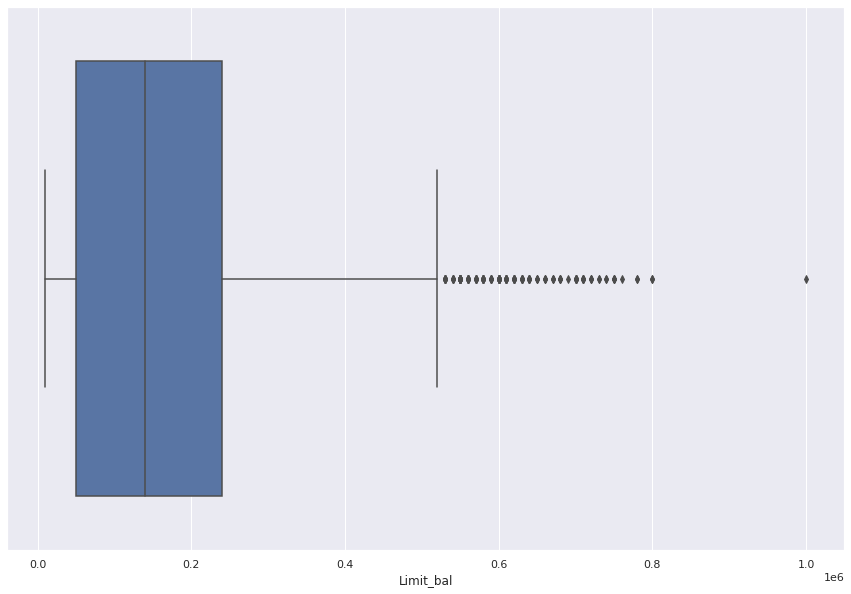

In [321]:
# Box plot of Limit balance
sns.boxplot(df['Limit_bal'])

In [322]:
# Binning the limit balance columns in 10 bins
limit_bal_group = pd.cut(df['Limit_bal'],bins=10)

In [323]:
# Checking the outliers
limit_bal_group.value_counts()

(9010.0, 109000.0]       12490
(109000.0, 208000.0]      7867
(208000.0, 307000.0]      5053
(307000.0, 406000.0]      2752
(406000.0, 505000.0]      1597
(505000.0, 604000.0]       127
(604000.0, 703000.0]        56
(703000.0, 802000.0]        22
(901000.0, 1000000.0]        1
(802000.0, 901000.0]         0
Name: Limit_bal, dtype: int64

In [324]:
# Checking the dependent variable values on the outlier points
df[df['Limit_bal']>=703000].Defaulter.value_counts()

0    20
1     3
Name: Defaulter, dtype: int64

In [325]:
# Removing the outliers
df=df[df['Limit_bal']<=703000].reset_index(drop=True)

## All Bills Columns

In [326]:
# creating Bills dataframe
bills_df = df[['Sep_Bill','Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill']]

In [327]:
# Describe bills column
bills_df.describe()

Sep_Bill       Aug_Bill  ...       May_Bill       Apr_Bill
count   29942.000000   29942.000000  ...   29942.000000   29942.000000
mean    51187.253290   49155.328635  ...   40269.001403   38821.955781
std     73281.858708   70892.416789  ...   60438.750802   59165.380034
min   -165580.000000  -69777.000000  ...  -81334.000000 -339603.000000
25%      3588.750000    3008.000000  ...    1782.250000    1261.000000
50%     22430.500000   21278.500000  ...   18126.500000   17111.500000
75%     67134.250000   64027.750000  ...   50208.500000   49205.750000
max    653062.000000  743970.000000  ...  823540.000000  699944.000000

[8 rows x 6 columns]

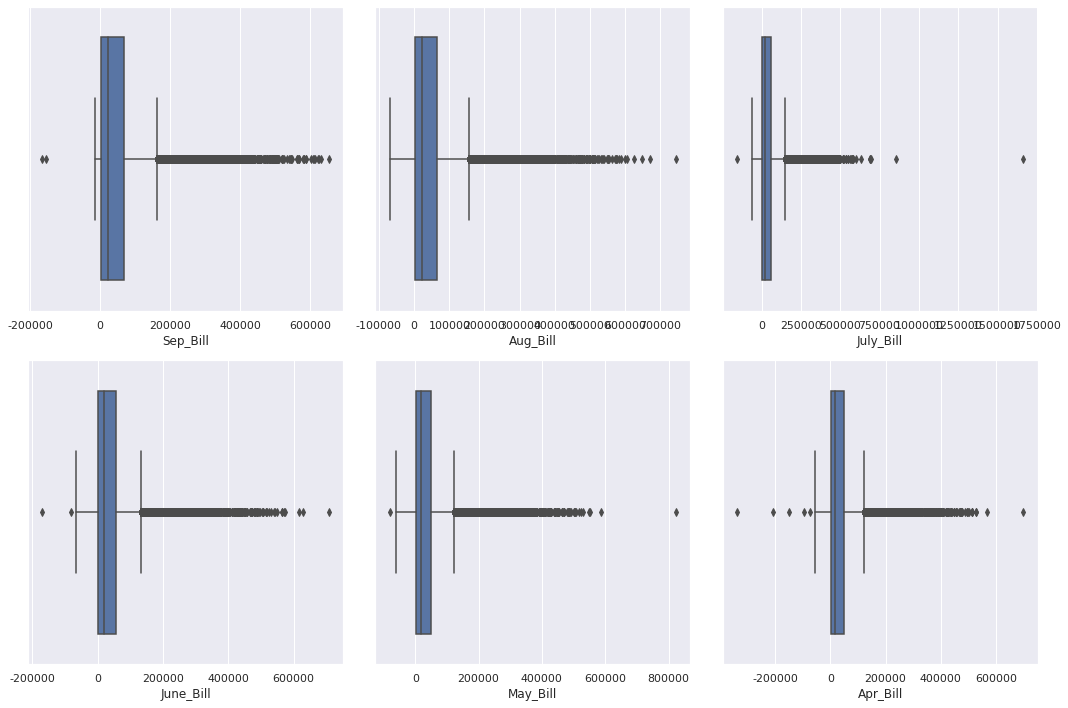

In [328]:
# Visualizing the outlier pints for each month
plt.figure(figsize=(15,10))
n=1
for column in bills_df.columns:
  plt.subplot(2,3,n)
  n=n+1
  ax=sns.boxplot(df[column])
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
  plt.tight_layout()

In [329]:
# Binning the bills coulmnns into 11bins each
bills_df['sep_group'] = pd.cut(bills_df['Sep_Bill'],bins=11)
bills_df['aug_group'] = pd.cut(bills_df['Aug_Bill'],bins=11)
bills_df['july_group'] = pd.cut(bills_df['July_Bill'],bins=11)
bills_df['june_group'] = pd.cut(bills_df['June_Bill'],bins=11)
bills_df['may_group'] = pd.cut(bills_df['May_Bill'],bins=11)
bills_df['apr_group'] = pd.cut(bills_df['Apr_Bill'],bins=11)

In [330]:
# Checking the outlier values for month september
bills_df['sep_group'].value_counts()

(-16736.0, 57686.0]        21474
(57686.0, 132108.0]         5078
(132108.0, 206530.0]        2002
(206530.0, 280952.0]         781
(280952.0, 355374.0]         332
(355374.0, 429796.0]         155
(429796.0, 504218.0]          79
(504218.0, 578640.0]          26
(578640.0, 653062.0]          13
(-166398.642, -91158.0]        2
(-91158.0, -16736.0]           0
Name: sep_group, dtype: int64

In [331]:
bills_df[bills_df['Sep_Bill']<=-5000].shape

(18, 12)

In [332]:
# Checking the outlier values for month august
bills_df['aug_group'].value_counts()

(4200.0, 78177.0]       15477
(-70590.747, 4200.0]     8268
(78177.0, 152154.0]      3711
(152154.0, 226131.0]     1472
(226131.0, 300108.0]      573
(300108.0, 374085.0]      239
(374085.0, 448062.0]      123
(448062.0, 522039.0]       55
(522039.0, 596016.0]       18
(596016.0, 669993.0]        4
(669993.0, 743970.0]        2
Name: aug_group, dtype: int64

In [333]:
bills_df[bills_df['Aug_Bill']<=-5000].shape

(33, 12)

In [334]:
# Checking the outlier values for month July
bills_df['july_group'].value_counts()

(8313.545, 173891.091]        17773
(-159085.353, 8313.545]       10387
(173891.091, 339468.636]       1530
(339468.636, 505046.182]        230
(505046.182, 670623.727]         17
(670623.727, 836201.273]          3
(1498511.455, 1664089.0]          1
(836201.273, 1001778.818]         1
(1332933.909, 1498511.455]        0
(1167356.364, 1332933.909]        0
(1001778.818, 1167356.364]        0
Name: july_group, dtype: int64

In [335]:
df[df['July_Bill']<=-5000].Defaulter.value_counts()

0    29
1     5
Name: Defaulter, dtype: int64

In [336]:
# Checking the outlier values for month June
bills_df['june_group'].value_counts().sort_values(ascending=False)

(-10570.182, 69144.727]      23787
(69144.727, 148859.636]       4061
(148859.636, 228574.545]      1348
(228574.545, 308289.455]       446
(308289.455, 388004.364]       179
(388004.364, 467719.273]        68
(467719.273, 547434.182]        29
(-90285.091, -10570.182]        15
(547434.182, 627149.091]         6
(627149.091, 706864.0]           2
(-170876.864, -90285.091]        1
Name: june_group, dtype: int64

In [337]:
df[df['June_Bill']<=-5000].Defaulter.value_counts()

0    24
1     9
Name: Defaulter, dtype: int64

In [338]:
# Checking the outlier values for month May
bills_df['may_group'].value_counts().sort_values(ascending=False)

(927.273, 83188.545]        18992
(-82238.874, 927.273]        6338
(83188.545, 165449.818]      3109
(165449.818, 247711.091]     1022
(247711.091, 329972.364]      314
(329972.364, 412233.636]      109
(412233.636, 494494.909]       46
(494494.909, 576756.182]       10
(576756.182, 659017.455]        1
(741278.727, 823540.0]          1
(659017.455, 741278.727]        0
Name: may_group, dtype: int64

In [339]:
df[df['May_Bill']<=-5000].Defaulter.value_counts()

0    36
1     6
Name: Defaulter, dtype: int64

In [340]:
# Checking the outlier values for month April
bills_df['apr_group'].value_counts().sort_values(ascending=False)

(-56090.182, 38414.091]       20843
(38414.091, 132918.364]        6836
(132918.364, 227422.636]       1692
(227422.636, 321926.909]        401
(321926.909, 416431.182]        114
(416431.182, 510935.455]         43
(510935.455, 605439.727]          6
(-150594.455, -56090.182]         3
(-245098.727, -150594.455]        2
(-340642.547, -245098.727]        1
(605439.727, 699944.0]            1
Name: apr_group, dtype: int64

In [341]:
df[df['Apr_Bill']<=-5000].Defaulter.value_counts()

0    46
1     7
Name: Defaulter, dtype: int64

In [342]:
# Removing the outliers
df=df[(df['Sep_Bill']<=504218) & (df['Sep_Bill']>=-5000) & (df['Aug_Bill']<=522039) & (df['Aug_Bill']>=-5000) & (df['July_Bill']<=505046) & (df['July_Bill']>=-5000) & (df['June_Bill']<=467719) & (df['June_Bill']>=-5000) & (df['May_Bill']<=494494) & (df['May_Bill']>=-5000) & (df['Apr_Bill']<=510935) & (df['Apr_Bill']>=-5000)].reset_index(drop=True)

In [343]:
df.head()

Limit_bal  Gender   Education  ... Pay_April  Defaulter  Age_group
0      20000  Female  university  ...         0          1      21-25
1     120000  Female  university  ...      2000          1      26-30
2      90000  Female  university  ...      5000          0      31-35
3      50000  Female  university  ...      1000          0      36-40
4      50000    Male  university  ...       679          0      56-60

[5 rows x 25 columns]

## All Payment columns

In [344]:
pay_df = df[['Pay_Sep','Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April']]

In [345]:
pay_df.describe()

Pay_Sep       Pay_Aug  ...        Pay_May      Pay_April
count   29741.000000  2.974100e+04  ...   29741.000000   29741.000000
mean     5562.056118  5.657096e+03  ...    4662.487879    5049.766282
std     15874.953306  1.813438e+04  ...   14420.564354   17050.374144
min         0.000000  0.000000e+00  ...       0.000000       0.000000
25%      1000.000000  8.460000e+02  ...     259.000000     118.000000
50%      2100.000000  2.007000e+03  ...    1500.000000    1500.000000
75%      5001.000000  5.000000e+03  ...    4000.000000    4000.000000
max    873552.000000  1.215471e+06  ...  426529.000000  528666.000000

[8 rows x 6 columns]

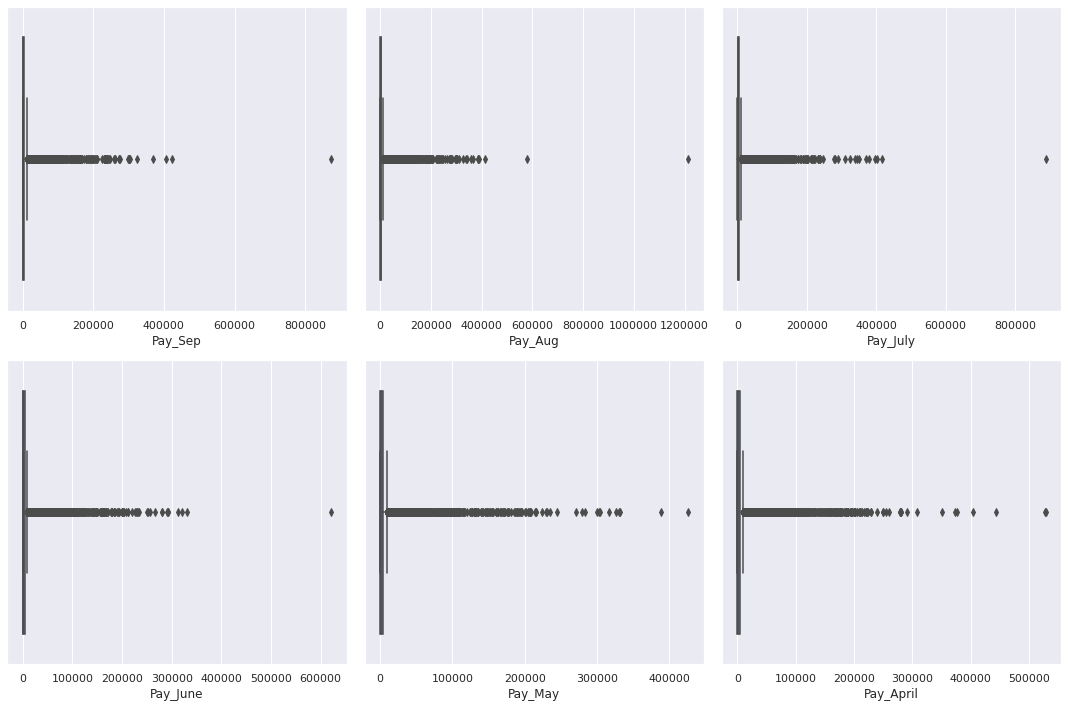

In [346]:
# Visualzing the outliers
plt.figure(figsize=(15,10))
n=1
for column in pay_df.columns:
  plt.subplot(2,3,n)
  n=n+1
  ax=sns.boxplot(df[column])
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
  plt.tight_layout()

In [347]:
# Binning the Payment columns into 11 bins each
pay_df['sep_pay_group'] = pd.cut(pay_df['Pay_Sep'],bins=11)
pay_df['aug_pay_group'] = pd.cut(pay_df['Pay_Aug'],bins=11)
pay_df['july_pay_group'] = pd.cut(pay_df['Pay_July'],bins=11)
pay_df['june_pay_group'] = pd.cut(pay_df['Pay_June'],bins=11)
pay_df['may_pay_group'] = pd.cut(pay_df['Pay_May'],bins=11)
pay_df['apr_pay_group'] = pd.cut(pay_df['Pay_April'],bins=11)

In [348]:
# Checking the ouliers for month September
pay_df['sep_pay_group'].value_counts()

(-873.552, 79413.818]       29517
(79413.818, 158827.636]       161
(158827.636, 238241.455]       41
(238241.455, 317655.273]       17
(397069.091, 476482.909]        2
(317655.273, 397069.091]        2
(794138.182, 873552.0]          1
(714724.364, 794138.182]        0
(635310.545, 714724.364]        0
(555896.727, 635310.545]        0
(476482.909, 555896.727]        0
Name: sep_pay_group, dtype: int64

In [349]:
# Checking the ouliers for month August
pay_df['aug_pay_group'].value_counts()

(-1215.471, 110497.364]      29589
(110497.364, 220994.727]       116
(220994.727, 331492.091]        26
(331492.091, 441989.455]         8
(1104973.636, 1215471.0]         1
(552486.818, 662984.182]         1
(994476.273, 1104973.636]        0
(883978.909, 994476.273]         0
(773481.545, 883978.909]         0
(662984.182, 773481.545]         0
(441989.455, 552486.818]         0
Name: aug_pay_group, dtype: int64

In [350]:
# Checking the ouliers for month July
pay_df['july_pay_group'].value_counts()

(-889.043, 80822.091]       29507
(80822.091, 161644.182]       185
(161644.182, 242466.273]       34
(323288.364, 404110.455]        8
(242466.273, 323288.364]        5
(808220.909, 889043.0]          1
(404110.455, 484932.545]        1
(727398.818, 808220.909]        0
(646576.727, 727398.818]        0
(565754.636, 646576.727]        0
(484932.545, 565754.636]        0
Name: july_pay_group, dtype: int64

In [351]:
# Checking the ouliers for month June
pay_df['june_pay_group'].value_counts()

(-621.0, 56454.545]         29397
(56454.545, 112909.091]       237
(112909.091, 169363.636]       66
(169363.636, 225818.182]       24
(225818.182, 282272.727]       10
(282272.727, 338727.273]        6
(564545.455, 621000.0]          1
(508090.909, 564545.455]        0
(451636.364, 508090.909]        0
(395181.818, 451636.364]        0
(338727.273, 395181.818]        0
Name: june_pay_group, dtype: int64

In [352]:
# Checking the ouliers for month May
pay_df['may_pay_group'].value_counts()

(-426.529, 38775.364]       29190
(38775.364, 77550.727]        311
(77550.727, 116326.091]       142
(116326.091, 155101.455]       37
(155101.455, 193876.818]       31
(193876.818, 232652.182]       16
(271427.545, 310202.909]        5
(310202.909, 348978.273]        4
(232652.182, 271427.545]        3
(387753.636, 426529.0]          2
(348978.273, 387753.636]        0
Name: may_pay_group, dtype: int64

In [353]:
# Checking the ouliers for month April
pay_df['apr_pay_group'].value_counts()

(-528.666, 48060.545]       29209
(48060.545, 96121.091]        303
(96121.091, 144181.636]       112
(144181.636, 192242.182]       66
(192242.182, 240302.727]       34
(240302.727, 288363.273]        8
(336423.818, 384484.364]        3
(480605.455, 528666.0]          2
(288363.273, 336423.818]        2
(432544.909, 480605.455]        1
(384484.364, 432544.909]        1
Name: apr_pay_group, dtype: int64

In [354]:
# Removing the outliers
df=df[(df['Pay_Sep']<=238241) & (df['Pay_Aug']<=220994) & (df['Pay_July']<=161644) & (df['Pay_June']<=169363) & (df['Pay_May']<=155101) & (df['Pay_April']<=192242)].reset_index(drop=True)

In [68]:
# Final data shape after removing outliers
df.shape

(29503, 24)

#<b> EDA 

## <b> Prepare Data for EDA

In [69]:
# Divide data from its basic feature 
cat_df = df[['Gender','Education','Marital_status','Age_group']]
repayment_df =df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]
bills_df = df[['Sep_Bill','Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill']]
pay_df = df[['Pay_Sep','Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April']]

In [70]:
# Binning the limit balance columns in 10 bins
limit_bal_group = pd.cut(df['Limit_bal'],bins=10)
# Binning the bills coulmnns into 11 bins each
bills_df['sep_group'] = pd.cut(bills_df['Sep_Bill'],bins=11)
bills_df['aug_group'] = pd.cut(bills_df['Aug_Bill'],bins=11)
bills_df['july_group'] = pd.cut(bills_df['July_Bill'],bins=11)
bills_df['june_group'] = pd.cut(bills_df['June_Bill'],bins=11)
bills_df['may_group'] = pd.cut(bills_df['May_Bill'],bins=11)
bills_df['apr_group'] = pd.cut(bills_df['Apr_Bill'],bins=11)
# Binning the Payment columns into 11 bins each
pay_df['sep_pay_group'] = pd.cut(pay_df['Pay_Sep'],bins=11)
pay_df['aug_pay_group'] = pd.cut(pay_df['Pay_Aug'],bins=11)
pay_df['july_pay_group'] = pd.cut(pay_df['Pay_July'],bins=11)
pay_df['june_pay_group'] = pd.cut(pay_df['Pay_June'],bins=11)
pay_df['may_pay_group'] = pd.cut(pay_df['Pay_May'],bins=11)
pay_df['apr_pay_group'] = pd.cut(pay_df['Pay_April'],bins=11)

##<b> Dependent Variable

In [71]:
# value count 
df['Defaulter'].value_counts()

0    22950
1     6553
Name: Defaulter, dtype: int64

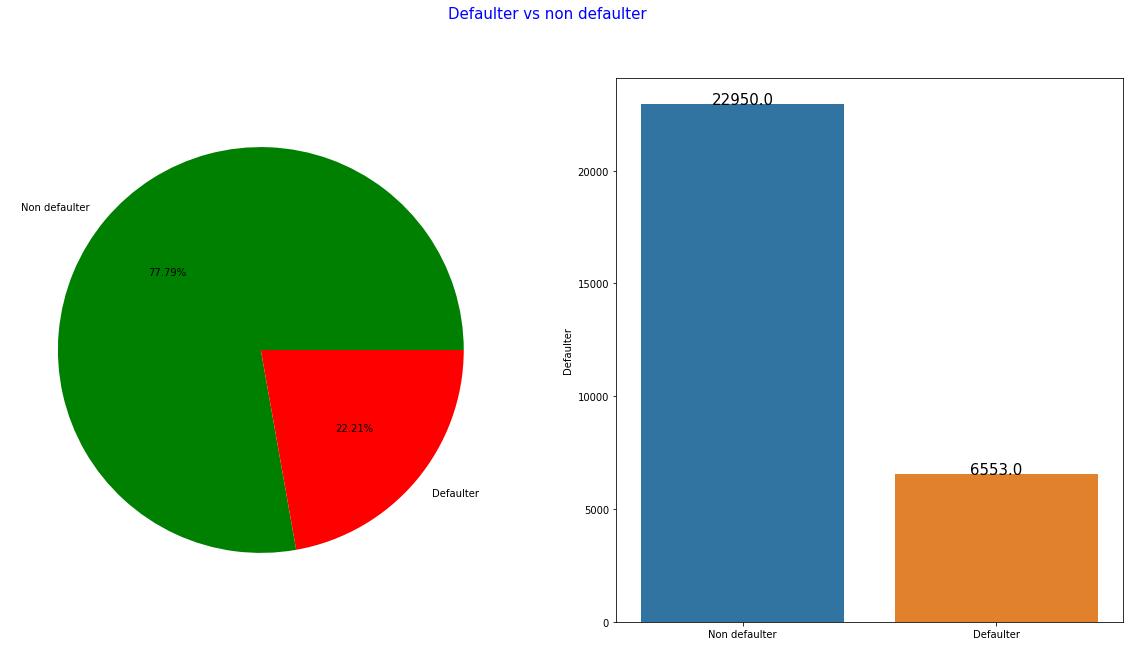

In [72]:
# Pie plot
plt.figure(figsize=(20,10))
plt.suptitle("Defaulter vs non defaulter",fontsize=15,color='blue')
plt.subplot(1,2,1)
plt.pie(df['Defaulter'].value_counts(),labels=['Non defaulter','Defaulter'],autopct='%0.2f%%',colors=['green','red'])
plt.subplot(1,2,2)
ax=sns.barplot(['Non defaulter','Defaulter'],df['Defaulter'].value_counts())
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 15)

plt.show()

<b>22 % of the customers are Defaulters and rest are non defaulters, we observed data is imbalanced 

##<b> Categorical DataFrame

In [73]:
# viewing first 5 rows of Catogerical data frame
cat_df.head()

Gender   Education Marital_status Age_group
0  Female  university        married     21-25
1  Female  university         single     26-30
2  Female  university         single     31-35
3  Female  university        married     36-40
4    Male  university        married     56-60

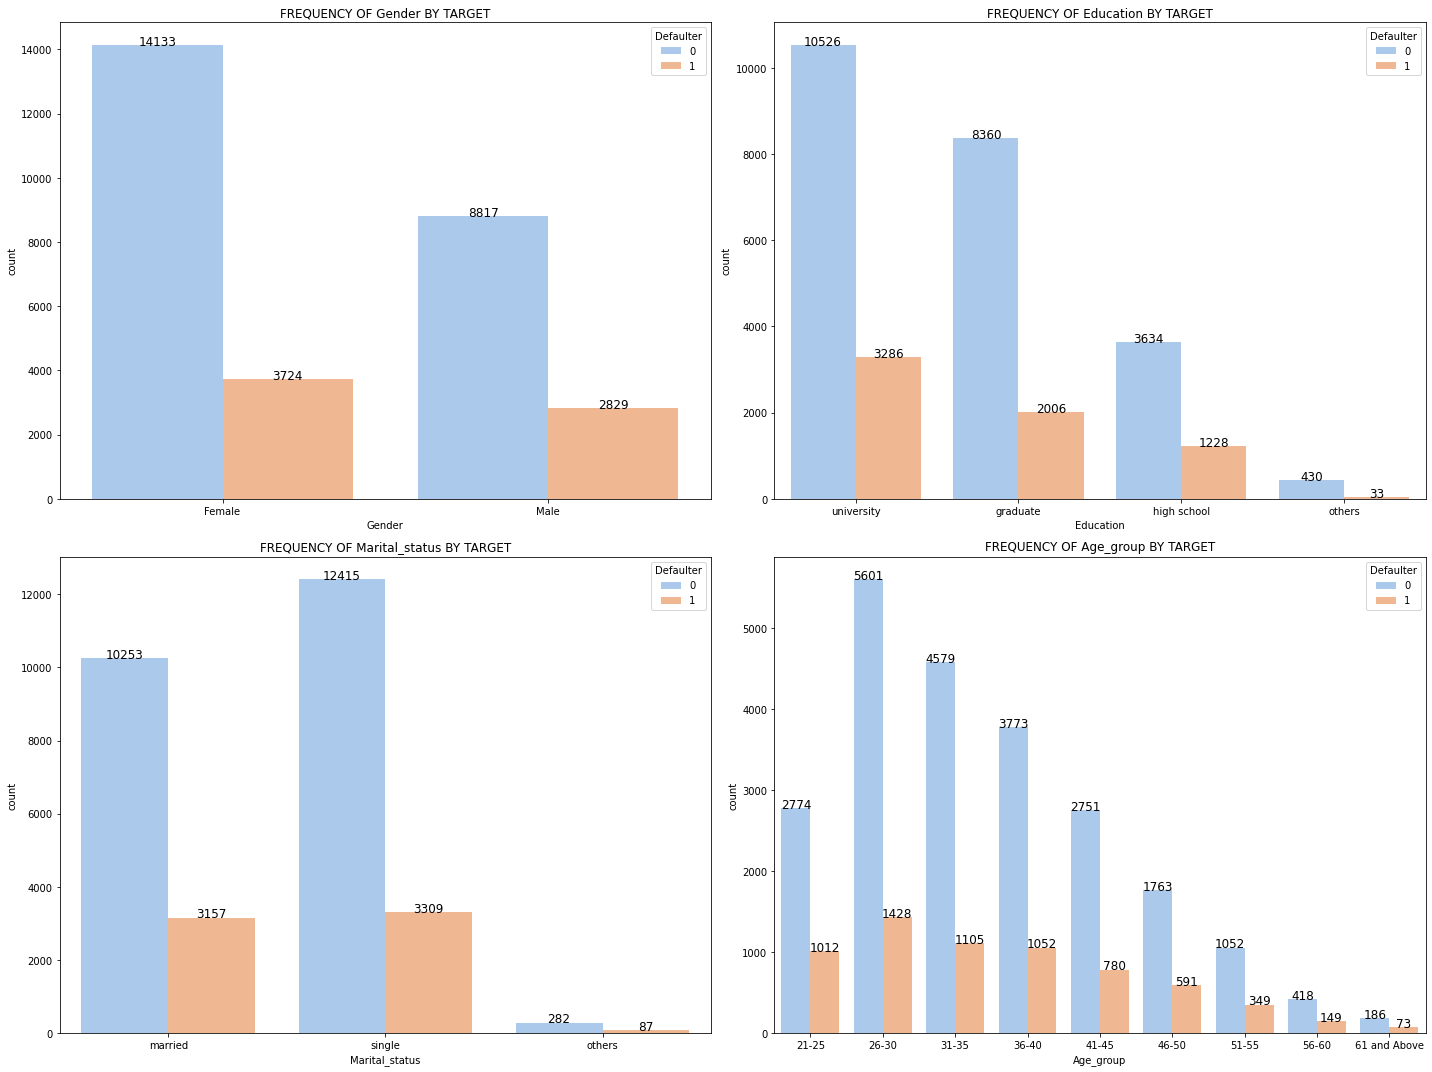

In [74]:
# FREQUENCY OF categorical feature by TARGET
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = sns.countplot(cat_df[i], hue=df["Defaulter"],palette='pastel')
  
  plt.title(f'FREQUENCY OF {i} BY TARGET')
  plt.tight_layout()
  for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

<b> This is the visualized comparision of Defaulters and non defaulters with respect to catogerical features.
and we observe that the ratio of defaulters and non defaulters are following same trend on all the categorical features

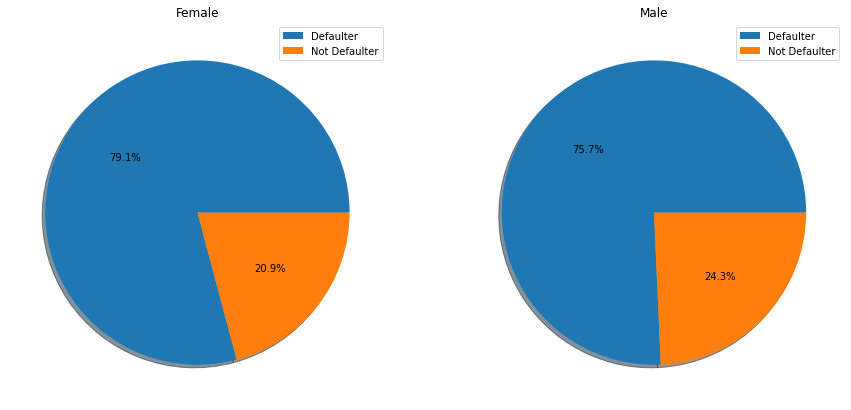

In [75]:
# Percentage of Defaulters with respect to Gender
plt.figure(figsize=(15,10))
j=1
for i in list(np.unique(df['Gender'])):
  plt.subplot(1, 2, j)
  j+=1
  df[df['Gender']==i].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,labeldistance=None)
  plt.legend(['Defaulter','Not Defaulter'], fontsize=10)
  plt.ylabel('')
  plt.title(i)

<b> Men have slightly higher chance of being a defaulter than women 

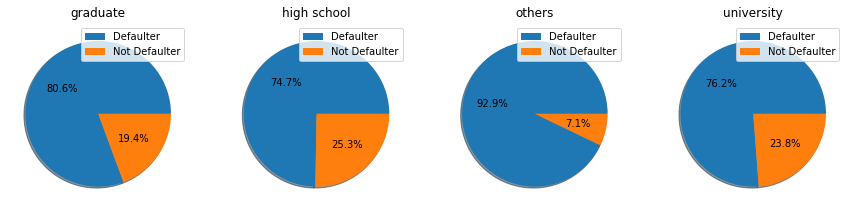

In [76]:
# Percentage of Defaulter column with respect to Education
plt.figure(figsize=(15,10))
j=1
for i in list(np.unique(df['Education'])):
  plt.subplot(1,4, j)
  j+=1
  df[df['Education']==i].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,labeldistance=None)
  plt.legend(['Defaulter','Not Defaulter'], fontsize=10)
  plt.ylabel('')
  plt.title(i)
plt.show()

<b> University have slightly higher chance of being a defaulter han others

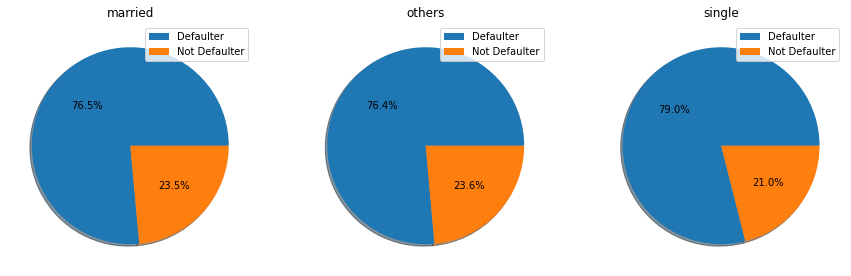

In [77]:
# Percentage of Defaulter column with respect to Marital status
plt.figure(figsize=(15,10))
j=1
for i in list(np.unique(df['Marital_status'])):
  plt.subplot(1,3, j)
  j+=1
  df[df['Marital_status']==i].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,labeldistance=None)
  plt.legend(['Defaulter','Not Defaulter'], fontsize=10)
  plt.ylabel('')
  plt.title(i)
plt.show()

<b> We cannot say whether someone will be a defaulter or not from his marital status

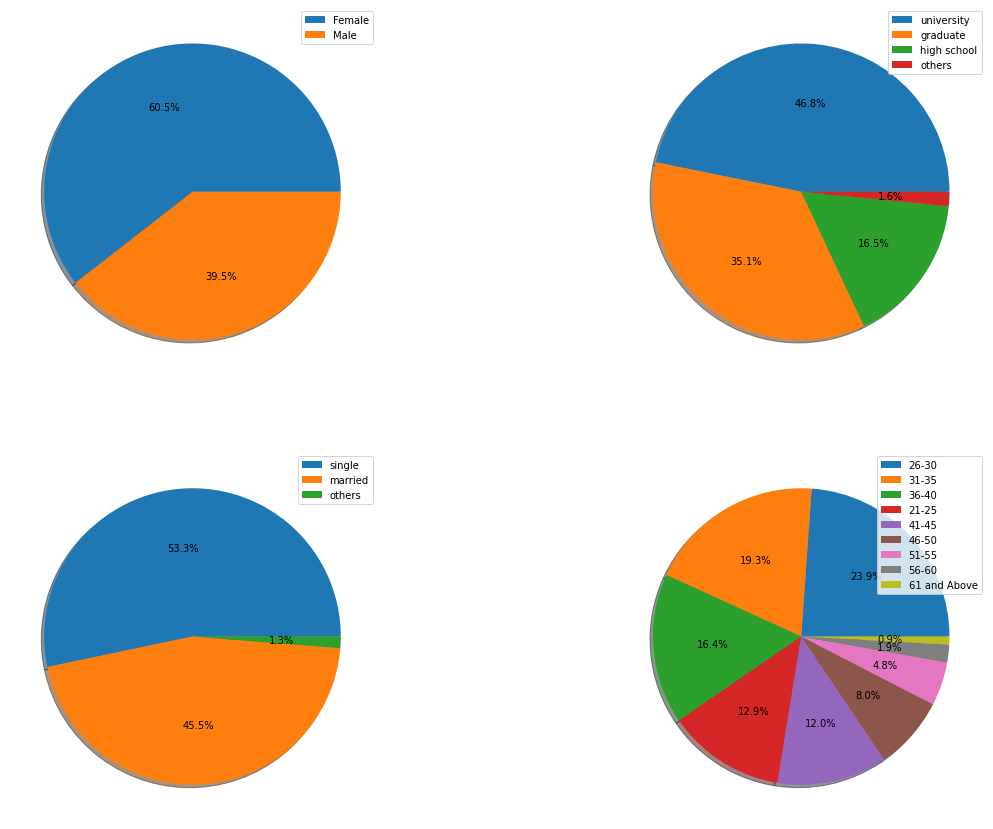

In [78]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  cat_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,labeldistance=None)
  plt.legend(fontsize=10)
  plt.ylabel('')
  

<b> The complete catogerical data set has been analysed individually with repsect to their sub categories .

##<b> Repayment Dataframe

In [79]:
repayment_df.head()

Repayment_September  Repayment_August  ...  Repayment_May  Repayment_April
0                    2                 2  ...              0                0
1                    0                 2  ...              0                2
2                    0                 0  ...              0                0
3                    0                 0  ...              0                0
4                    0                 0  ...              0                0

[5 rows x 6 columns]

In [80]:
# Describe repayment df
repayment_df.describe()

Repayment_September  Repayment_August  ...  Repayment_May  Repayment_April
count         29503.000000      29503.000000  ...   29503.000000     29503.000000
mean              0.358370          0.323391  ...       0.224248         0.229502
std               0.762573          0.805410  ...       0.721658         0.719133
min               0.000000          0.000000  ...       0.000000         0.000000
25%               0.000000          0.000000  ...       0.000000         0.000000
50%               0.000000          0.000000  ...       0.000000         0.000000
75%               0.000000          0.000000  ...       0.000000         0.000000
max               8.000000          8.000000  ...       8.000000         8.000000

[8 rows x 6 columns]

In [81]:
# Considering repayment more 3 months delay as one subcategory. only for the better visualization
for i in repayment_df.columns:
  repayment_df[i] = repayment_df[i].apply(lambda x:3 if x>=3 else x)

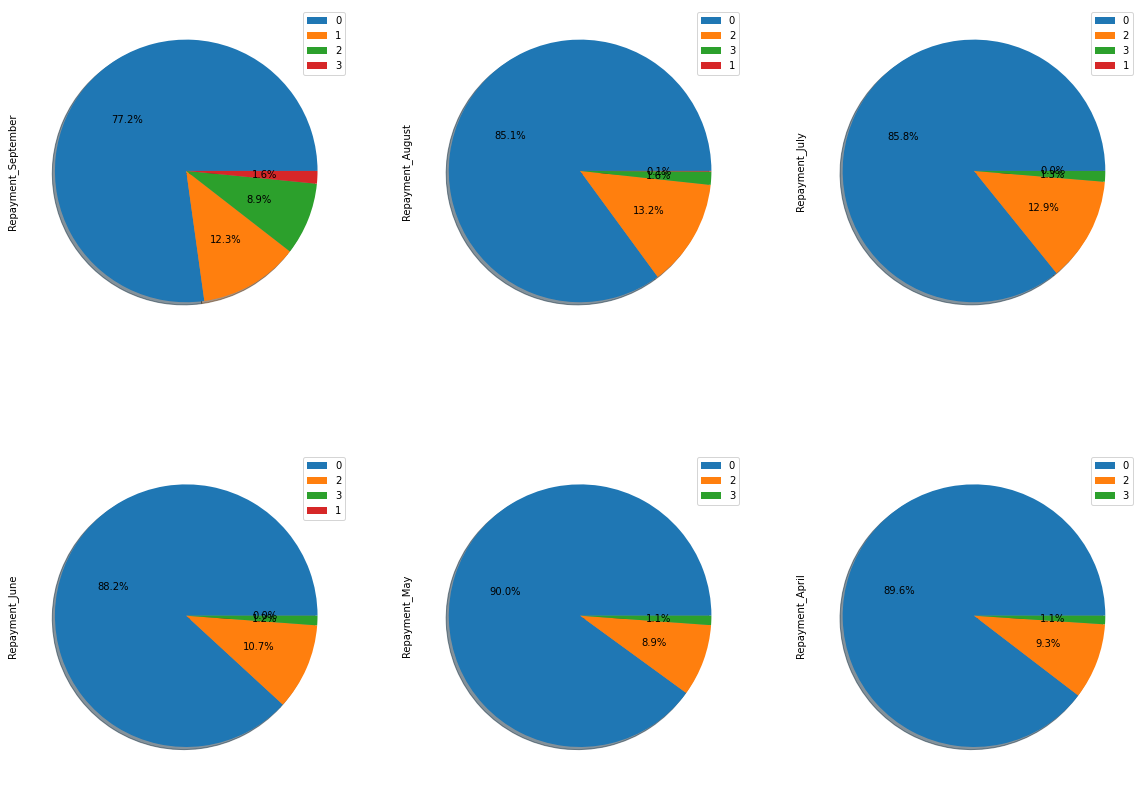

In [82]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(2,3,n)
  n=n+1
  ax = repayment_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,labeldistance=None)
  plt.legend()

<b> Most of the customers pay duly in each months 

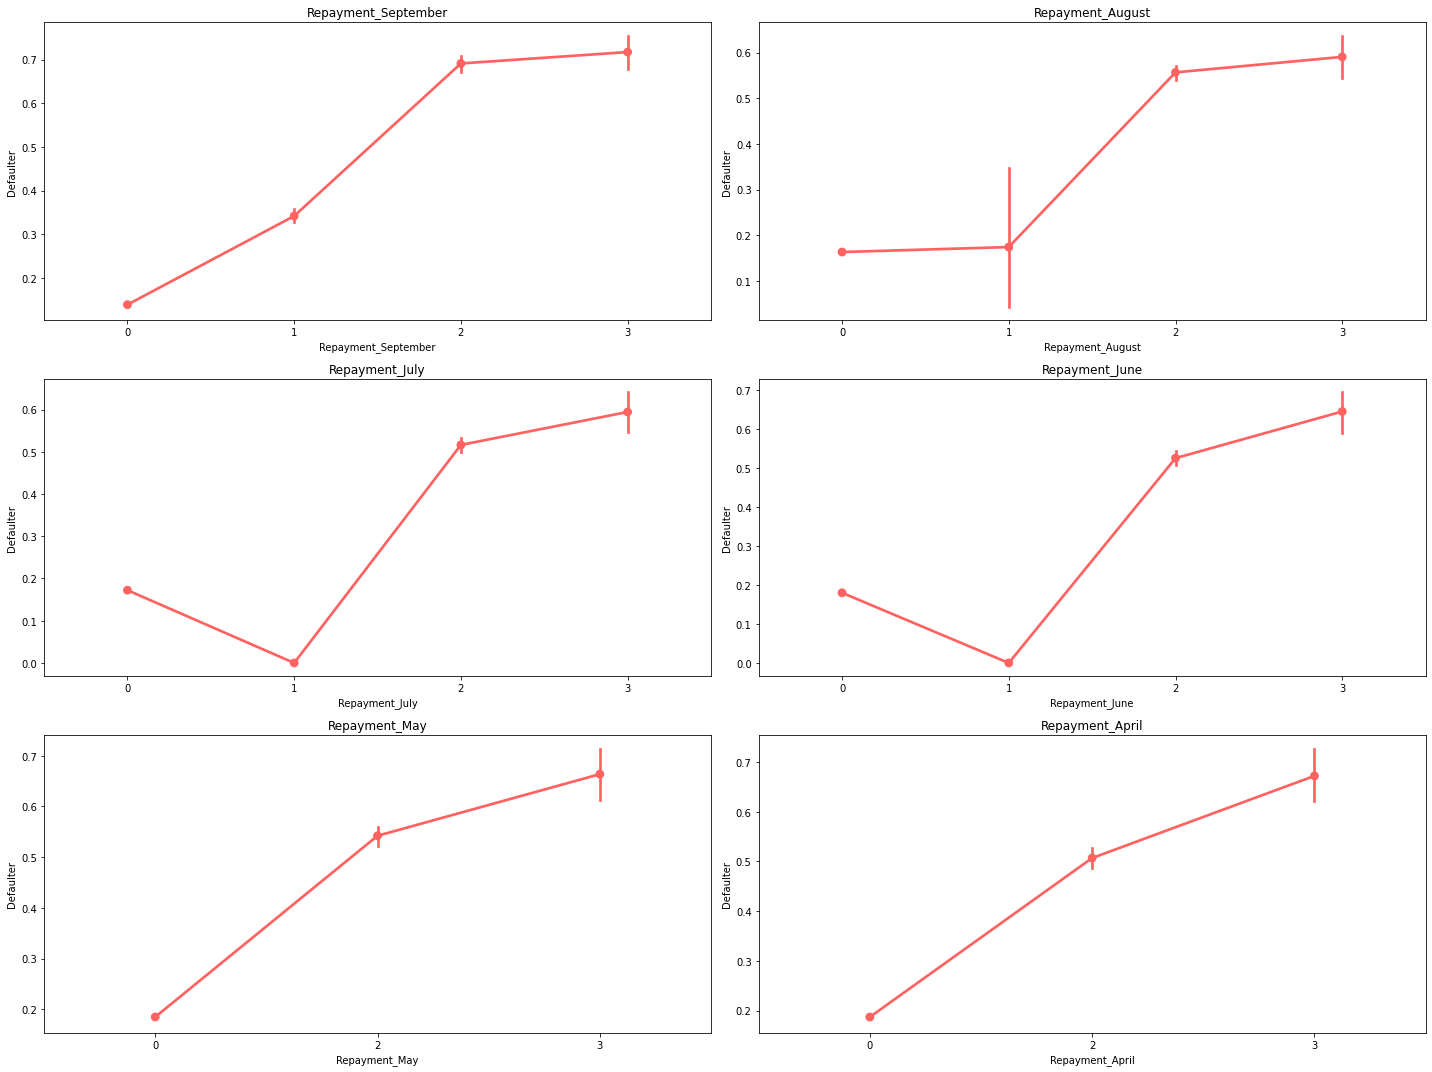

In [83]:
# plt pointplot
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(3,2,n)
  n=n+1
  sns.pointplot(repayment_df[i],df['Defaulter'],color='#ff6361')
  plt.title(i)
  plt.tight_layout()

<b> The probabilty of customer being Defaulter is directly proportional to delay in repayment

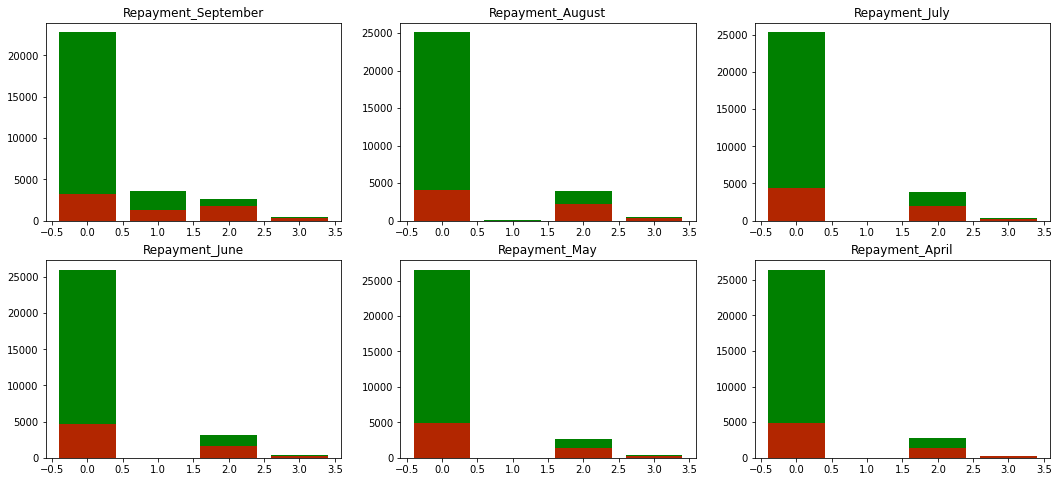

In [84]:

pay_status_columns = repayment_df.columns
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = repayment_df[pay_status_columns[i]].value_counts()
    x = repayment_df[pay_status_columns[i]][(df['Defaulter']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])    
plt.show()

<b> When Customers are pay duly then the count of defaulter is low.
<b> Defaulters are high when they are 3 months late

##<b> Limit Balance

In [85]:
# Describe Limit balance column
df['Limit_bal'].describe()

count     29503.000000
mean     164446.994543
std      126722.923016
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      700000.000000
Name: Limit_bal, dtype: float64

75% of the customers have a limit balance of less than 230,000

posx and posy should be finite values
posx and posy should be finite values


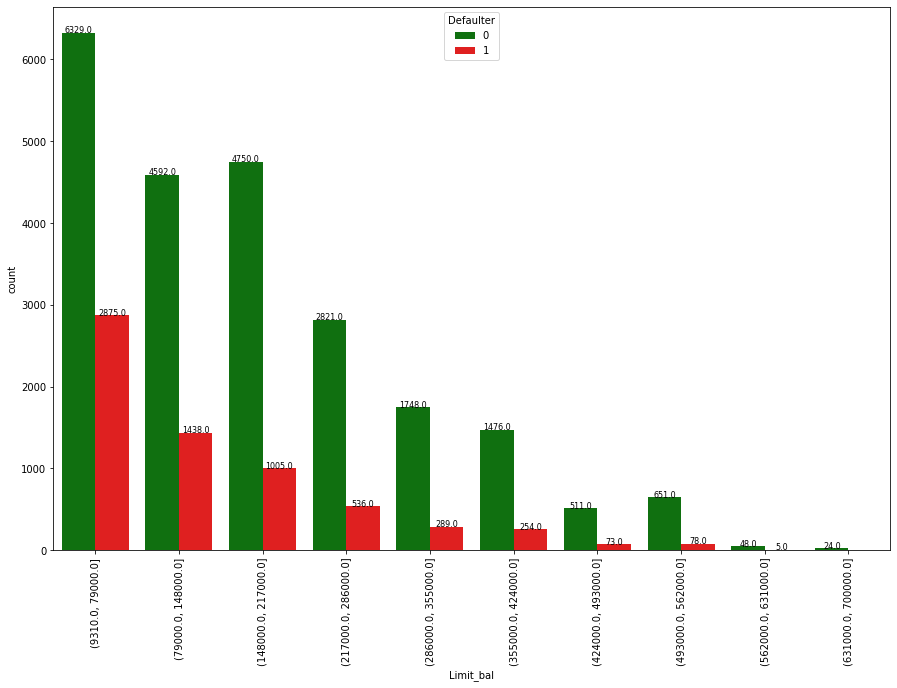

In [86]:
#countplot for visualizing the limit bal group with Defaulters 
plt.figure(figsize=(15,10))
ax=sns.countplot(limit_bal_group,hue=df['Defaulter'],palette=["green", "red"])
plt.xticks(rotation=90)

for rect in ax.patches:
  ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 8)
plt.show()

We observed that the limit balance does not have a high impact on the customer being a defaulter. 

##<b> Bills Dataframe 

In [87]:
bills_df.head()

Sep_Bill  Aug_Bill  ...              may_group               apr_group
0      3913      3102  ...  (-5474.49, 38135.455]  (-5473.305, 38027.727]
1      2682      1725  ...  (-5474.49, 38135.455]  (-5473.305, 38027.727]
2     29239     14027  ...  (-5474.49, 38135.455]  (-5473.305, 38027.727]
3     46990     48233  ...  (-5474.49, 38135.455]  (-5473.305, 38027.727]
4      8617      5670  ...  (-5474.49, 38135.455]  (-5473.305, 38027.727]

[5 rows x 12 columns]

In [88]:
#Describe bill data frame
bills_df.describe()

Sep_Bill       Aug_Bill  ...       May_Bill       Apr_Bill
count   29503.000000   29503.000000  ...   29503.000000   29503.000000
mean    49684.548283   47737.839338  ...   38702.703928   37256.244992
std     69178.943257   66834.665961  ...   56171.350401   55039.017141
min     -4894.000000   -4925.000000  ...   -5000.000000   -5000.000000
25%      3558.500000    3003.000000  ...    1776.500000    1254.500000
50%     22206.000000   21080.000000  ...   18027.000000   16897.000000
75%     66029.500000   62918.000000  ...   49506.500000   48501.500000
max    502904.000000  511629.000000  ...  469490.000000  468305.000000

[8 rows x 6 columns]

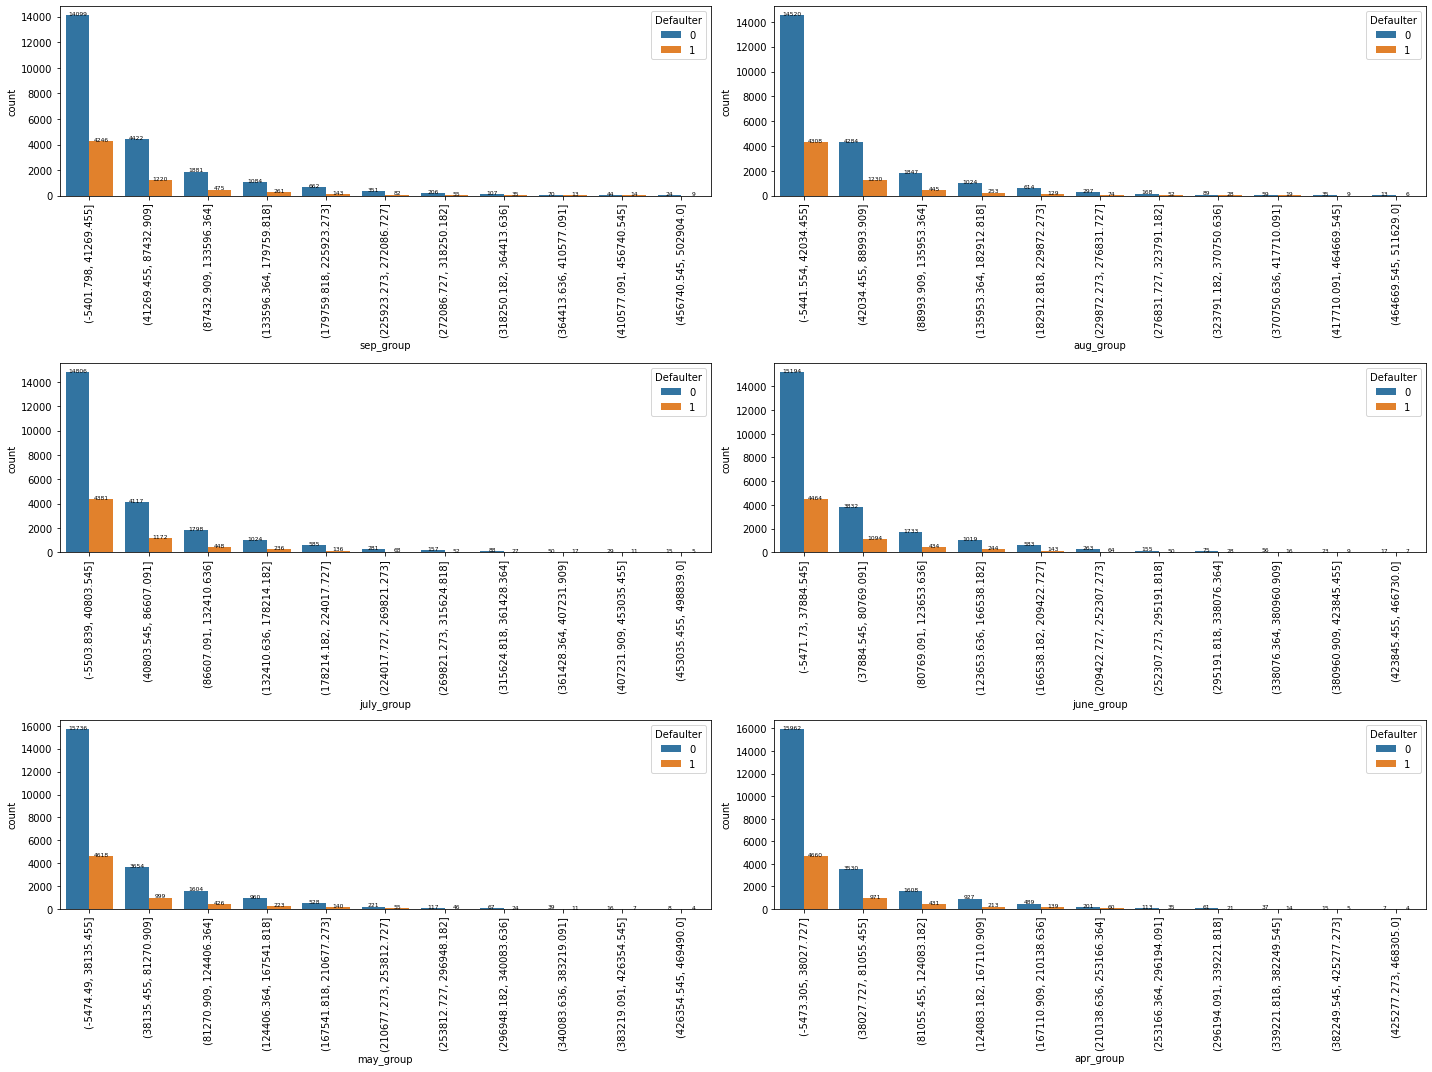

In [89]:
# For Visualizing we are grouping the columns
columns = ['sep_group', 'aug_group', 'july_group', 'june_group','may_group', 'apr_group']
n = 1
plt.figure(figsize=(20,15))
for column in columns:
  plt.subplot(3,2,n)
  n = n+1
  ax=sns.countplot(bills_df[column],hue=df['Defaulter'])
  plt.xticks(rotation=90)
  plt.tight_layout()
  for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 6)

In [90]:
# maximum billing in each month
total_bill = []
for i in bills_df.describe().columns:
  max = bills_df[i].sum()
  total_bill.append(max)

print('Maximum Bills', total_bill)
# Average bill in each Month
avg_bill = []
for i in bills_df.describe().columns:
  avg = bills_df[i].mean()
  avg_bill.append(avg)

print('Average Bills',avg_bill)

Maximum Bills [1465843228, 1408409474, 1338107146, 1226873420, 1141845874, 1099170996]
Average Bills [49684.548283225435, 47737.83933837237, 45354.951903196285, 41584.70053892824, 38702.70392841406, 37256.244992034706]


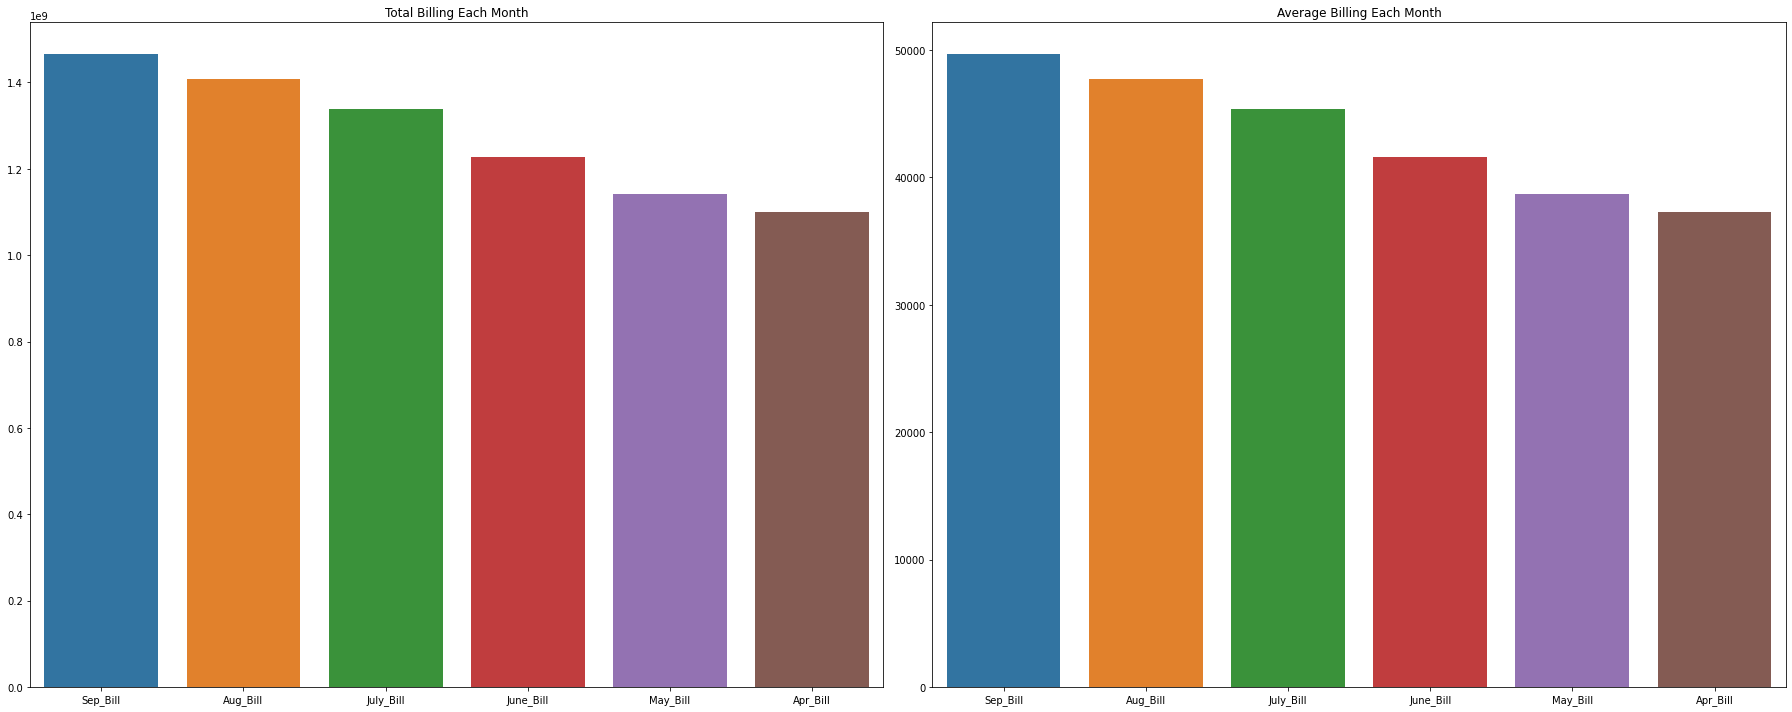

In [91]:
# visualization of maximum & Average billing each month
fig,axes = plt.subplots(1,2,figsize=(25,10))
sns.barplot(bills_df.describe().columns, list(df[i].sum() for i in bills_df.describe().columns),ax=axes[0]).set_title("Total Billing Each Month")
sns.barplot(bills_df.describe().columns,list(df[i].mean() for i in bills_df.describe().columns),ax=axes[1]).set_title("Average Billing Each Month")
plt.tight_layout()

It is observed that the both total biling of the month and the average billing has an increasing trend over each month. 

After treatment of outliers we consider the maximum bill hr month ke lagbhag same hai pr average bill me hme pta chal rha hai ki bills april month ke baad badh rhe hai

##<b> Payment Dataframe

In [92]:
pay_df.head()

Pay_Sep  Pay_Aug  ...        may_pay_group          apr_pay_group
0        0      689  ...  (-155.067, 14097.0]  (-189.853, 17259.364]
1        0     1000  ...  (-155.067, 14097.0]  (-189.853, 17259.364]
2     1518     1500  ...  (-155.067, 14097.0]  (-189.853, 17259.364]
3     2000     2019  ...  (-155.067, 14097.0]  (-189.853, 17259.364]
4     2000    36681  ...  (-155.067, 14097.0]  (-189.853, 17259.364]

[5 rows x 12 columns]

In [93]:
#Describe pay_df
pay_df.describe()

Pay_Sep        Pay_Aug  ...        Pay_May      Pay_April
count   29503.000000   29503.000000  ...   29503.000000   29503.000000
mean     5258.462224    5192.885808  ...    4179.445887    4533.106125
std     12800.476271   12897.899649  ...   10411.298560   12966.785388
min         0.000000       0.000000  ...       0.000000       0.000000
25%      1000.000000     832.000000  ...     244.500000     100.000000
50%      2100.000000    2002.000000  ...    1500.000000    1500.000000
75%      5000.000000    5000.000000  ...    4000.000000    4000.000000
max    237000.000000  220230.000000  ...  155067.000000  189853.000000

[8 rows x 6 columns]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


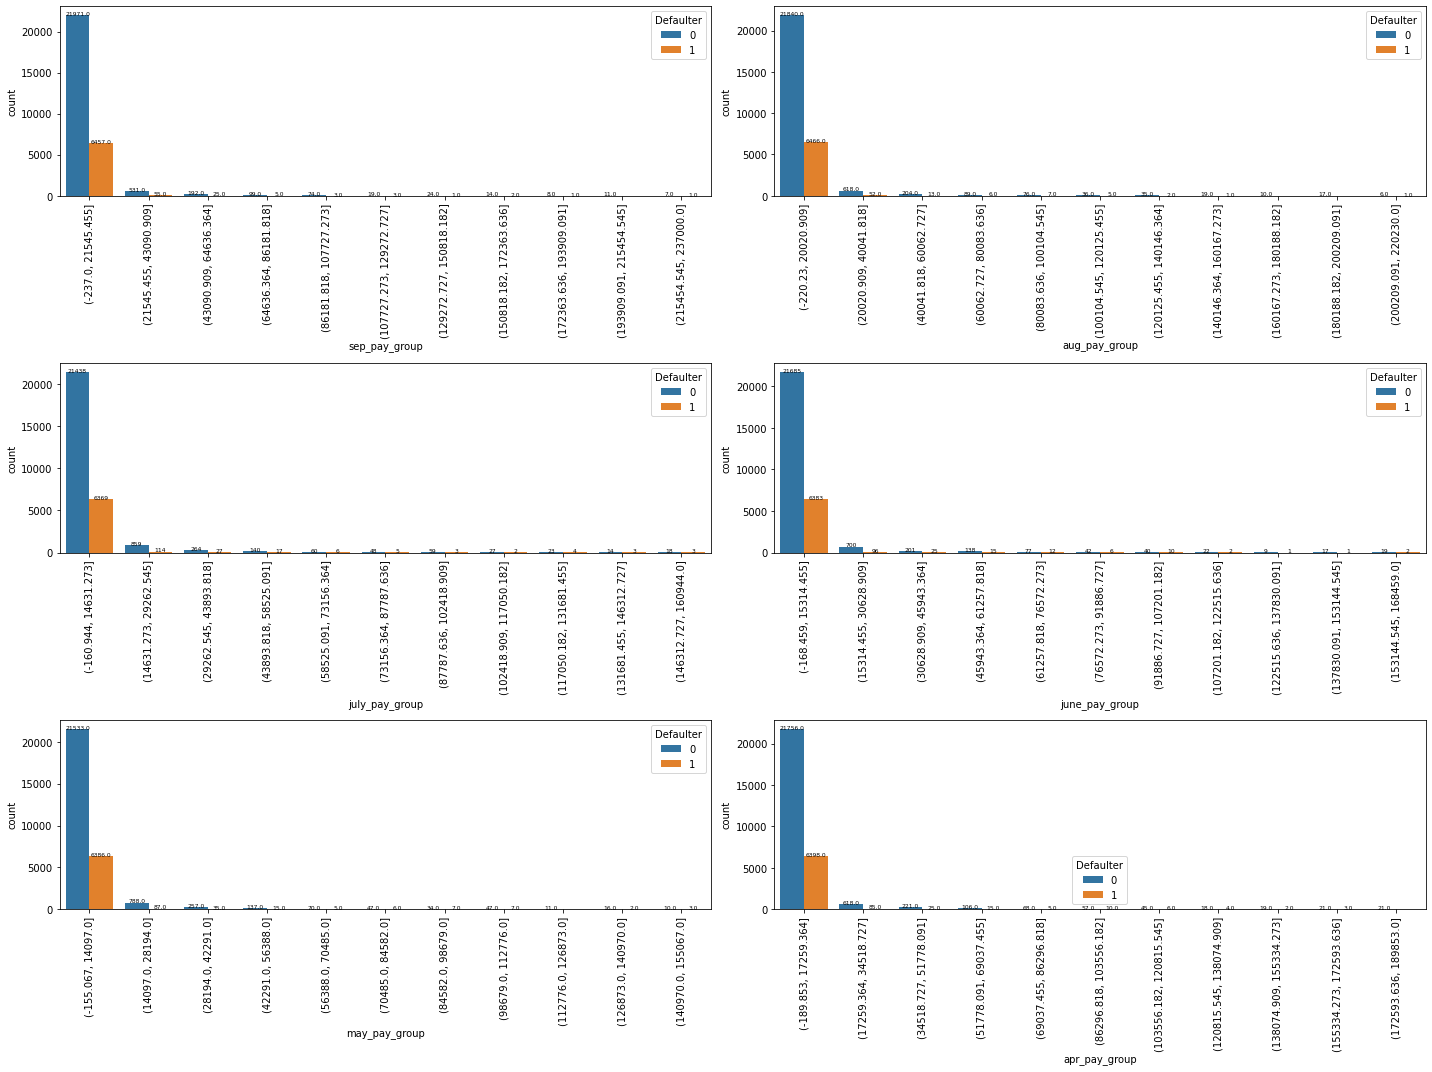

In [94]:

columns = ['sep_pay_group', 'aug_pay_group', 'july_pay_group', 'june_pay_group',
       'may_pay_group', 'apr_pay_group']
n = 1
plt.figure(figsize=(20,15))
for column in columns:
  plt.subplot(3,2,n)
  n = n+1
  ax=sns.countplot(pay_df[column],hue=df['Defaulter'])
  plt.xticks(rotation=90)
  plt.tight_layout()
  for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 6)

In [95]:
# maximum Payment in each month
max_pay = []
for i in pay_df.describe().columns:
  max = pay_df[i].max()
  max_pay.append(max)

print('Maximum Payment', max_pay)
# Average Payment in each Month
avg_pay = []
for i in pay_df.describe().columns:
  avg = pay_df[i].mean()
  avg_pay.append(avg)

print('Average Payment',avg_pay)

Maximum Payment [237000, 220230, 160944, 168459, 155067, 189853]
Average Payment [5258.462224180592, 5192.885808222893, 4582.136664068061, 4303.877165034064, 4179.445886858964, 4533.106124800867]


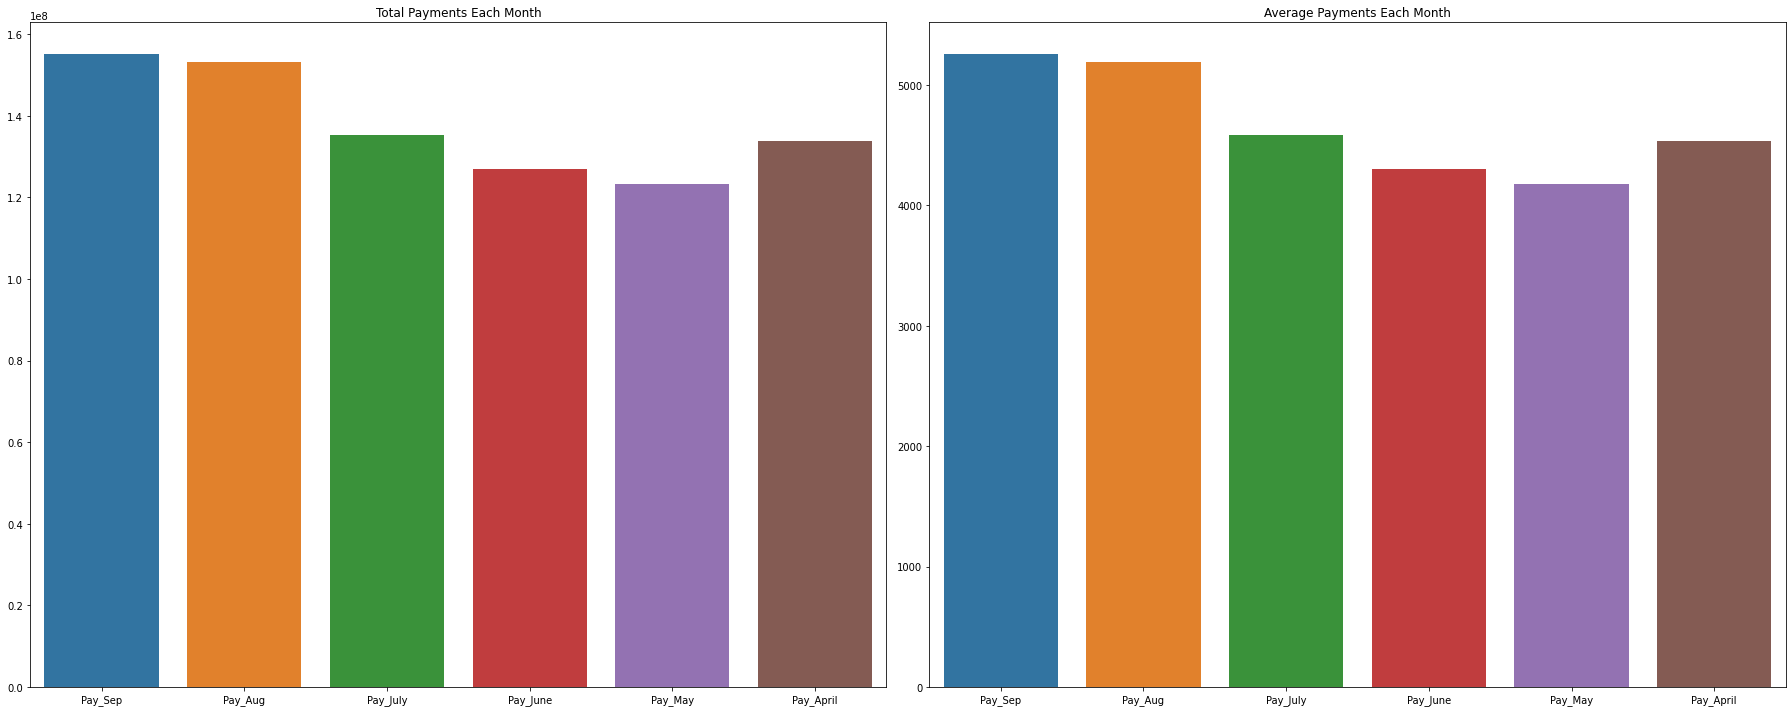

In [96]:
# visualization of maximum, minimum & Average billing each month
fig,axes = plt.subplots(1,2,figsize=(25,10))
sns.barplot(pay_df.describe().columns,list(df[i].sum() for i in pay_df.describe().columns),ax=axes[0]).set_title("Total Payments Each Month")
sns.barplot(pay_df.describe().columns,list(df[i].mean() for i in pay_df.describe().columns),ax=axes[1]).set_title("Average Payments Each Month")
plt.tight_layout()

#<b> Correlation 

In [97]:
#Correlation With dependent Variable 
abs(df.corr()['Defaulter']).sort_values(ascending=False)

Defaulter              1.000000
Repayment_September    0.396253
Repayment_August       0.327817
Repayment_July         0.287800
Repayment_June         0.270691
Repayment_May          0.262095
Repayment_April        0.245731
Limit_bal              0.156389
Pay_Aug                0.088425
Pay_Sep                0.085073
Pay_July               0.077841
Pay_May                0.069238
Pay_June               0.067807
Pay_April              0.066135
Sep_Bill               0.026101
Aug_Bill               0.018997
July_Bill              0.015256
June_Bill              0.010888
May_Bill               0.007530
Apr_Bill               0.003412
Name: Defaulter, dtype: float64

It is observed that repayment columns and limit balance have higher correlation with the dependant variable. 


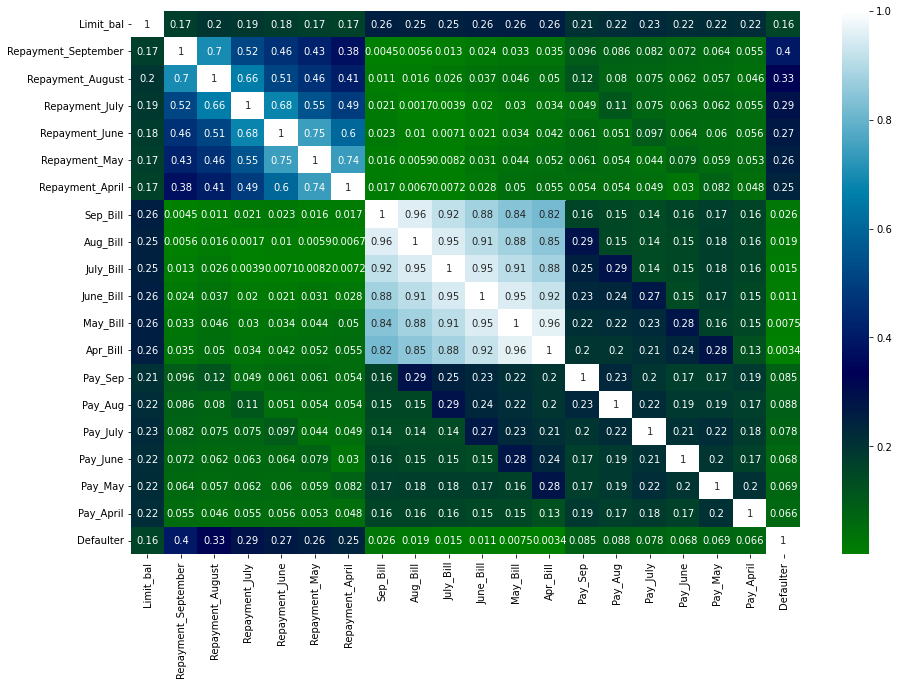

In [98]:
# Heatmap of correlation
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()),cmap='ocean',annot=True)

#<b> Optimization
##Before moving onto performance metrics, let’s discuss optimization. What metric exactly are we optimizing? In this case, we are optimizing recall.

##Ideally, we do not want to allow any defaults to fall through the cracks, so our optimal model will minimize False Negatives (So RecallScore is as high as possible).

#<b> Prepare Data for algoritmes

In [99]:
# Using One hot encoding on categorical features and storing in new data frame
new_df = pd.get_dummies(df,drop_first=True)

In [100]:
new_df.head()

Limit_bal  Repayment_September  ...  Age_group_56-60  Age_group_61 and Above
0      20000                    2  ...                0                       0
1     120000                    0  ...                0                       0
2      90000                    0  ...                0                       0
3      50000                    0  ...                0                       0
4      50000                    0  ...                1                       0

[5 rows x 34 columns]

In [101]:
# split our data frame to dependent and independent features
X =new_df.drop(columns=['Defaulter'])
y =new_df['Defaulter']

##<b> using smote for over sampling

In [102]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29503
Resampled dataset shape 45900


In [103]:
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [104]:
#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#<b> Defining Function

##<b> Defining the function (without Cv and Hyperparameter tuning) 

In [105]:
#Creating empty list for storing metrices scores
train_accuracy_sco = []
test_accuracy_sco  = [] 
train_precision_sco = []
test_precision_sco =[]
train_recall_sco  = []
test_recall_sco  = []
train_f1_sco = []
test_f1_sco = []
train_roc_sco =[]
test_roc_sco =[]

In [106]:
# Defining the function (without Cv and Hyperparameter tuning)
def matrix_without_hp(x_train,x_test,y_train,y_true):
  Log = LogisticRegression()
  SGD = SGDClassifier()
  svc = SVC()
  KNN = KNeighborsClassifier()
  DSTree = DecisionTreeClassifier()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBClassifier(silent=True)

  models = [Log, SGD, svc, KNN, DSTree, RFC, GBC, XGBC]

  for i in models:
    i.fit(x_train,y_train)
    train_pred = i.predict(x_train)
    test_pred = i.predict(x_test)

    # accuracy score
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_true,test_pred)
    
    # Precision score
    train_precision = precision_score(y_train,train_pred)
    test_precision = precision_score(y_true,test_pred)
    
    #recall Score
    train_recall = recall_score(y_train,train_pred)
    test_recall = recall_score(y_true,test_pred)
    
    # F1 score
    train_f1 = f1_score(y_train,train_pred)
    test_f1 = f1_score(y_true,test_pred)
    
    # ROC_AUC Score
    train_roc = roc_auc_score(y_train,train_pred)
    test_roc = roc_auc_score(y_true,test_pred)
    

    train_accuracy_sco.append(train_accuracy)
    test_accuracy_sco.append(test_accuracy)
    train_precision_sco.append(train_precision)
    test_precision_sco.append(test_precision)
    train_recall_sco.append(train_recall)
    test_recall_sco.append(test_recall)
    train_f1_sco.append(train_f1)
    test_f1_sco.append(test_f1)
    train_roc_sco.append(train_roc)
    test_roc_sco.append(test_roc)
  

  
  scores = pd.DataFrame(list(zip(train_accuracy_sco,test_accuracy_sco,train_precision_sco,test_precision_sco,
                                 train_recall_sco,test_recall_sco,train_f1_sco,test_f1_sco,train_roc_sco,test_roc_sco )),
                        index=['Logistic Regression', 'SGD', 'svc', 'KNN', 'DSTree', 'RFC', 'GBC', 'XGBC'],
                        columns=['train_accuracy_sco','test_accuracy_sco','train_precision_sco','test_precision_sco',
                                 'train_recall_sco','test_recall_sco','train_f1_sco','test_f1_sco','train_roc_sco','test_roc_sco'])
  return scores
  

## Defining fuction for all algorithem with hyperparameter tuning 

In [107]:
#Creating empty list for storing metrices scores
train_accuracy_score = []
test_accuracy_score  = [] 
train_precision_score = []
test_precision_score =[]
train_recall_score  = []
test_recall_score  = []
train_f1_score = []
test_f1_score = []
train_roc_score =[]
test_roc_score =[]

In [152]:
#
def matrix(model,x_train,x_test,y_train,y_true, logistic = False):
  # fitting model
  model.fit(x_train,y_train)
  print('\n')
  print('='*30, 'Training score','='*30)
  training = model.score(x_train,y_train)
  print('\n')
  print('Training score  = ', training)
 
  print('\n')

  # if we are using grid search sc or random search cv printing best parameters and best score
  print('='*20, 'Best Parameters and Best score','='*20)
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_train
  train_pred = model.predict(x_train) 
  # predicting x_test
  test_pred = model.predict(x_test)
  print('\n')

  # printing all metrices scores on training set and test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  train_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_true,test_pred)
  print('Train Accuracy score = ',train_accuracy)
  print('Test Accuracy score = ',test_accuracy)
  train_precision = precision_score(y_train,train_pred)
  test_precision = precision_score(y_true,test_pred)
  print('Train Precision score = ', train_precision)
  print('Test Precision score = ', test_precision)
  train_recall = recall_score(y_train,train_pred)
  test_recall = recall_score(y_true,test_pred)
  print('Train Recall score = ',train_recall)
  print('Test Recall score = ',test_recall)
  train_f1 = f1_score(y_train,train_pred)
  test_f1 = f1_score(y_true,test_pred)
  print('Train F1 score = ',train_f1) 
  print('Test F1 score = ',test_f1) 
  train_roc = roc_auc_score(y_train,train_pred)
  test_roc = roc_auc_score(y_true,test_pred)
  print('Train ROC_AUC score = ',train_roc) 
  print('Test ROC_AUC score = ',test_roc) 
  print('\n')

  # Classification Report on test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_true, test_pred, target_names=target_names))
  print('\n')
  # Classification Report on train set
  print('='*30, 'Classification Report on train set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_train, train_pred, target_names=target_names))
  print('\n')

  # Graph of cofusion matrix on test set
  print('='*30, 'Confusion Matrix on test set','='*30)
  cf_matrix = confusion_matrix(y_true,test_pred)
  plt.title('Heatmap of confusion matrix on test set',fontsize=15)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')

  # Graph of cofusion matrix
  print('='*30, 'Confusion Matrix on train set','='*30)
  cf_matrix = confusion_matrix(y_train,train_pred)
  plt.title('Heatmap of confusion matrix on train set',fontsize=15)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')
  
  try:
  # logistc regression top 10 feature
    print('='*40, 'Top 10 Feature Importance','='*40)
    if logistic == True:
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(model.best_estimator_.coef_).ravel() }).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    # for other models top 10 features 
    else :
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':(model.best_estimator_.feature_importances_)}).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    
    sns.set(rc={'figure.figsize':(15,10)})
    ax=sns.barplot(x=X.columns[:10],y=top_10['Importance'])
    plt.xticks(rotation=90)
    for index, row in top_10.iterrows():
      ax.text(row.name,row.Importance, round(row.Importance,4), color='red', ha="center")
    plt.show()
  except:
    pass

  #roc_auc Curve
  test_fpr, test_tpr, test_threshold = roc_curve(y_true, test_pred)
  train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_pred)
  test_roc_auc = auc(test_fpr, test_tpr)
  train_roc_auc = auc(train_fpr, train_tpr)

  # method I: plt
  plt.title('Receiver Operating Characteristic curves')
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()



  
  train_accuracy_score.append(train_accuracy)
  test_accuracy_score.append(test_accuracy)
  train_precision_score.append(train_precision)
  test_precision_score.append(test_precision)
  train_recall_score.append(train_recall)
  test_recall_score.append(test_recall)
  train_f1_score.append(train_f1)
  test_f1_score.append(test_f1)
  train_roc_score.append(train_roc)
  test_roc_score.append(test_roc)

  
  
  return train_pred,test_pred



##<b> Defining functions for model Explainability

### <b>*Lime*

In [109]:
def lime_explainibilty(model, num_features, instance):
  feature_names =list(X.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, rf_random.best_estimator_.predict_proba, num_features=num_features)

  exp.show_in_notebook(show_table=True)

### *ELI5*

In [110]:
def eli5_explainability(model,row_number) :
  return eli.show_prediction(model, np.array(X_test.iloc[row_number]),
                    feature_names=X.columns.values,
                    show_feature_values=True)

### *Shap*

In [111]:
def shap_explainability(model,for_instance):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model)
  # obtain shap values for the first row of the test data
  shap_values = explainer(X_test,check_additivity=False)
  # visualize the first prediction's explanation with a force plot
  return shap.plots.force(shap_values[for_instance])

#<b>Models 

All the models are built and a dataframe evaluation metrics was obataned without hyperparameter tuning. 

Hyperparamter tuning was performed and the models were run again to optimise the results. 

In [112]:
# scores = matrix_without_hp(X_train_scaled,X_test_scaled,y_train,y_test)

In [113]:
# scores.sort_values("test_recall_sco",ascending=False)

##<b> Logistic Regression

In [114]:
# Parameters for logistic regression
logistic_parameters = {'C': [10],#0.001,0.01,0.1,1,10,100],
                       'penalty':['l2'],#l1, 'l2', 'elasticnet','None'],
                       'class_weight':['balanced'],#'dict',],
}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [115]:
# Using Grid Search for Hyperparameter Tuning
logistic_grid_search = GridSearchCV(LogisticRegression(),param_grid=logistic_parameters,cv=5,verbose=True,scoring='recall',n_jobs=-1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


============================== Training score ==============================


Training score  =  0.7781176599115093


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Best score  =   0.7775713004254179


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8067538126361655
Test Accuracy score =  0.8137254901960784
Train Precision score =  0.8244111349036403
Test Precision score =  0.8329171396140749
Train Recall score =  0.7781176599115093
Test Recall score =  0.7902218393280207
Train F1 score =  0.8005957398977125
Test F1 score =  0.8110079575596817
Train ROC_AUC score =  0.8066713863018146
Test ROC_AUC score =  0.8140000534528576


============================== Metrices scores on Train and Test Set ==============================
              precision

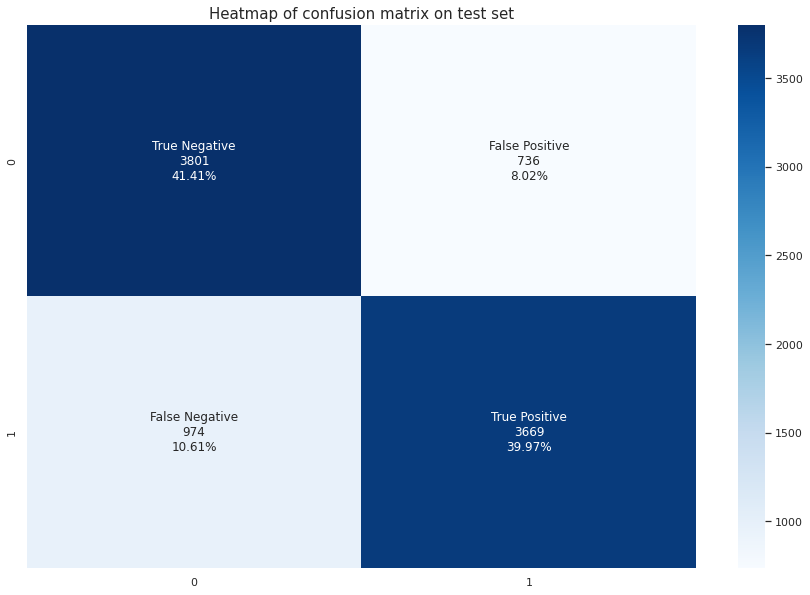



============================== Confusion Matrix on train set ==============================


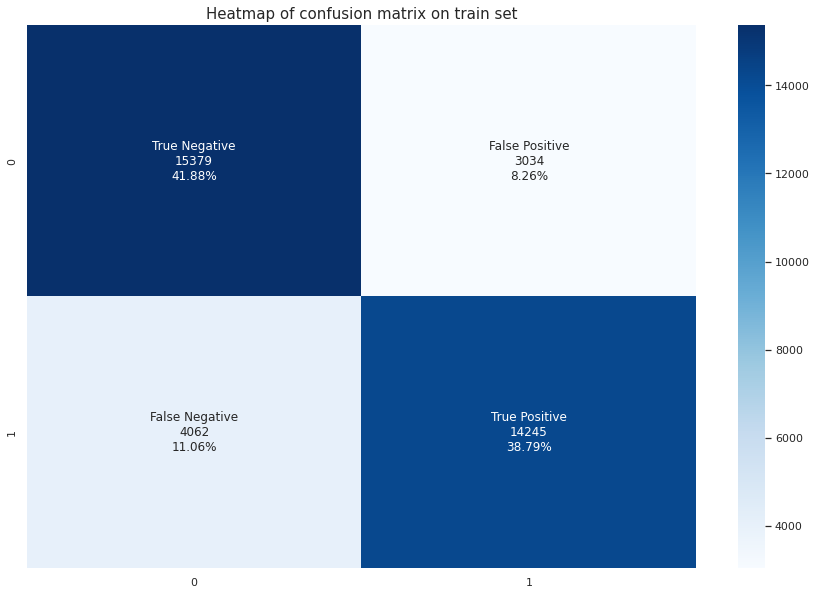



======================================== Top 10 Feature Importance ========================================


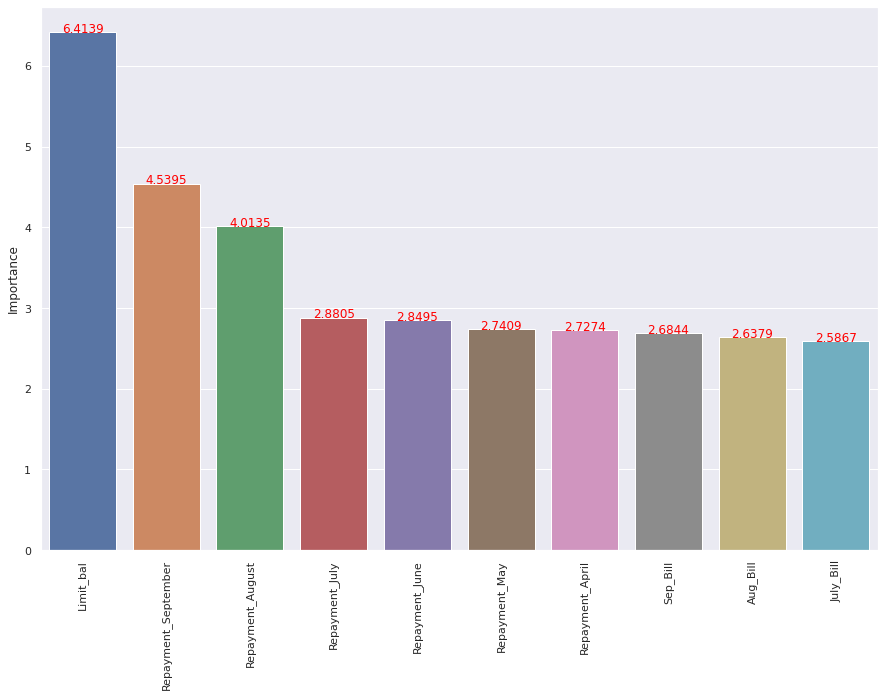

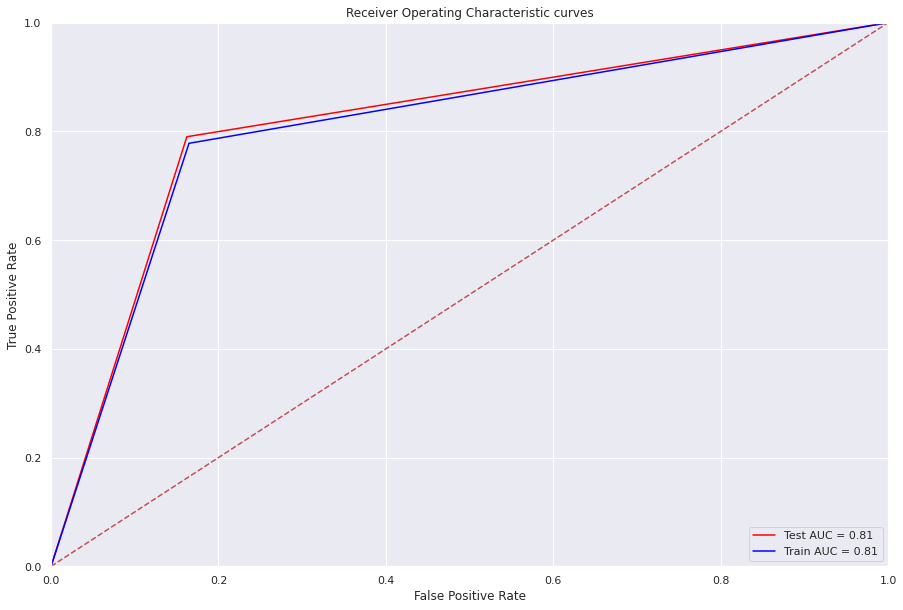

In [154]:
# Fit and evalute model with the help of self define function
logistic_train_pred, logistic_test_pred = matrix(logistic_grid_search,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

##<b> Stochastic Gradient Descent

In [157]:
# parameter for Stochastic Gradient Descent
sgd_params  = {'penalty':['l1',],#'l2', 'elasticnet'],
               'alpha':[0.001],#0.01,0.0001],
               'max_iter':[1500],
               'class_weight':['dict','balanced']
    
}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [158]:
# using grid search cv for hyperparameter tuning
sgd_grid = GridSearchCV(SGDClassifier(),param_grid=sgd_params,cv=5,scoring='recall',n_jobs=-1)



============================== Training score ==============================


Training score  =  0.7837439230895286


==================== Best Parameters and Best score ====================
best parameters  =   {'alpha': 0.001, 'class_weight': 'balanced', 'max_iter': 1500, 'penalty': 'l1'}
Best score  =   0.7809572641259345


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8005718954248366
Test Accuracy score =  0.8083877995642702
Train Precision score =  0.8100722673893406
Test Precision score =  0.8200177541056369
Train Recall score =  0.7837439230895286
Test Recall score =  0.79582166702563
Train F1 score =  0.7966906354979316
Test F1 score =  0.8077385506612744
Train ROC_AUC score =  0.8005234577702572
Test ROC_AUC score =  0.8085345937067757


============================== Metrices scores on Train and Test Set ==============================
              precision    recall  f1-score   support

    

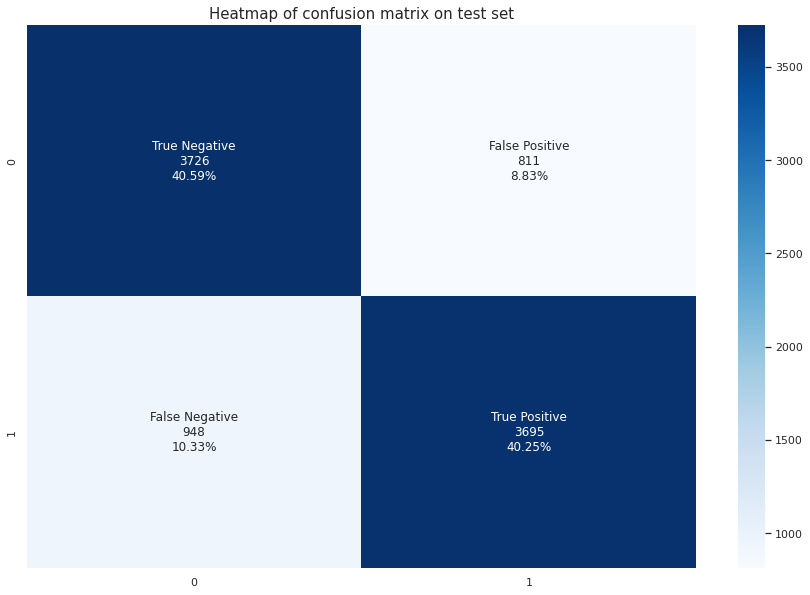



============================== Confusion Matrix on train set ==============================


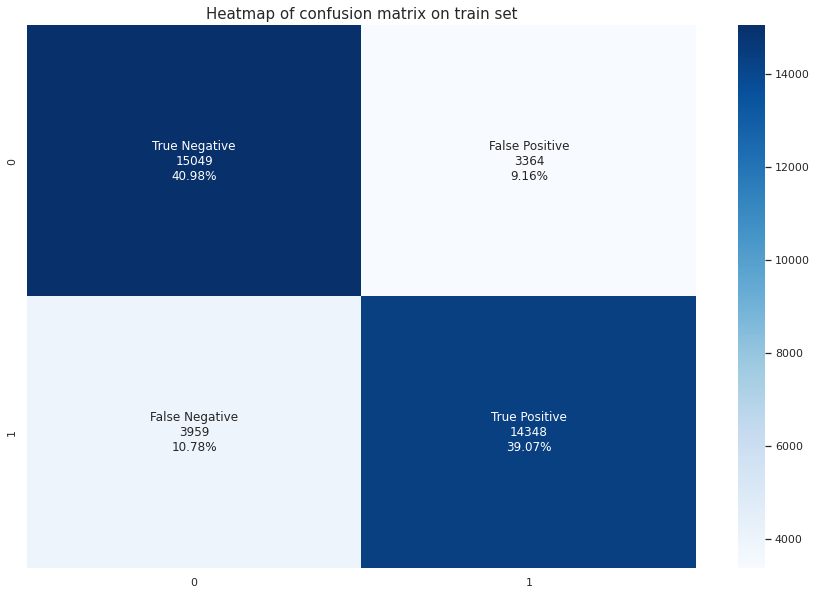



======================================== Top 10 Feature Importance ========================================


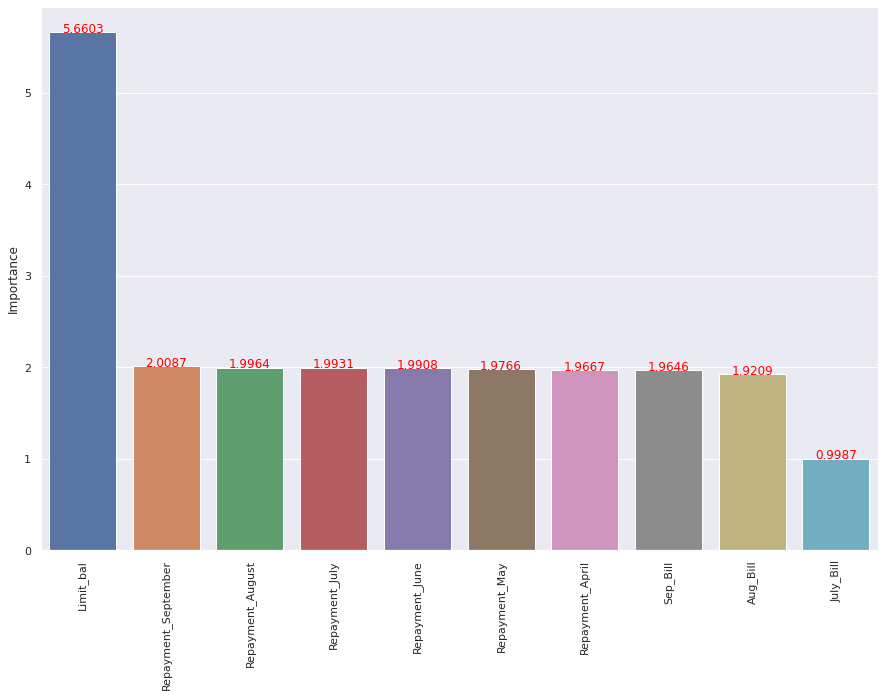

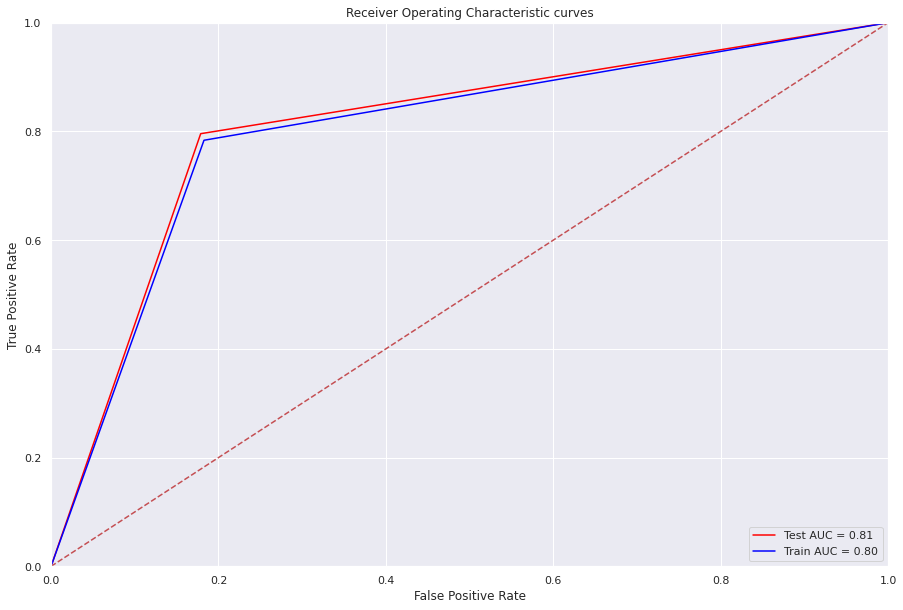

In [159]:
# Fit and evalute model with the help of self define function
sgd_train_pred, sgd_test_pred =  matrix(sgd_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

##<b> Support Vector Classifier

In [160]:
# parameter for Support Vector Classifier
svc_params = {'C':[5],# range(5,10,2),
              'kernel':['rbf'],#'linear', 'poly', 'sigmoid',],    
}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [161]:
# using grid search cv for hyperparameter tuning
svc_grid = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='recall',n_jobs=-1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


============================== Training score ==============================


Training score  =  0.76145736603485


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 5, 'kernel': 'rbf'}
Best score  =   0.7498225871441356


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8270969498910675
Test Accuracy score =  0.8240740740740741
Train Precision score =  0.875518150986057
Test Precision score =  0.8741967375185369
Train Recall score =  0.76145736603485
Test Recall score =  0.761791944863235
Train F1 score =  0.814514008589208
Test F1 score =  0.8141328116008748
Train ROC_AUC score =  0.8269080128387469
Test ROC_AUC score =  0.8248016369676544


============================== Metrices scores on Train and Test Set ==============================
              precision    recall  f1-score   support

    

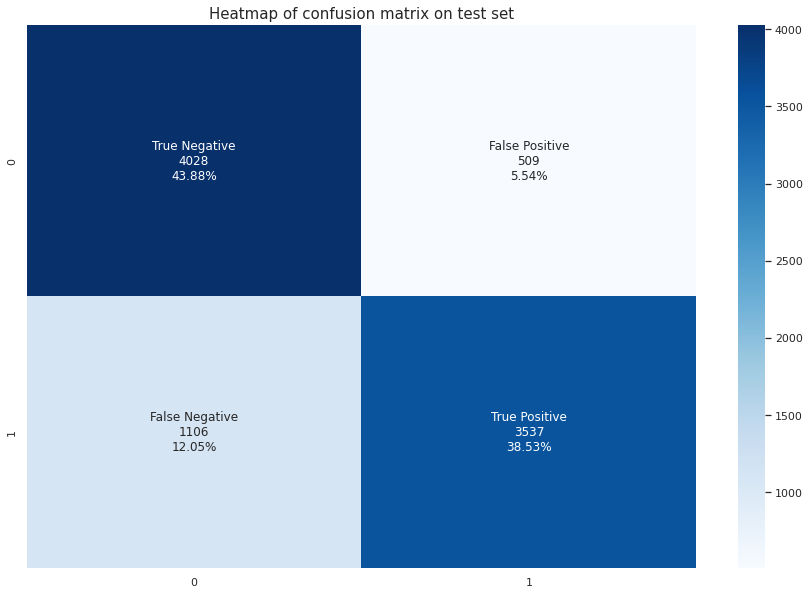



============================== Confusion Matrix on train set ==============================


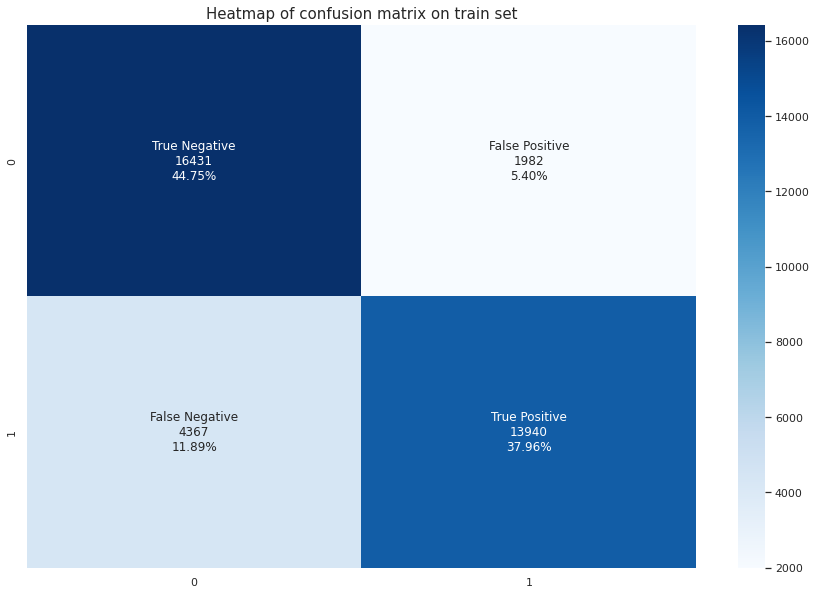



======================================== Top 10 Feature Importance ========================================


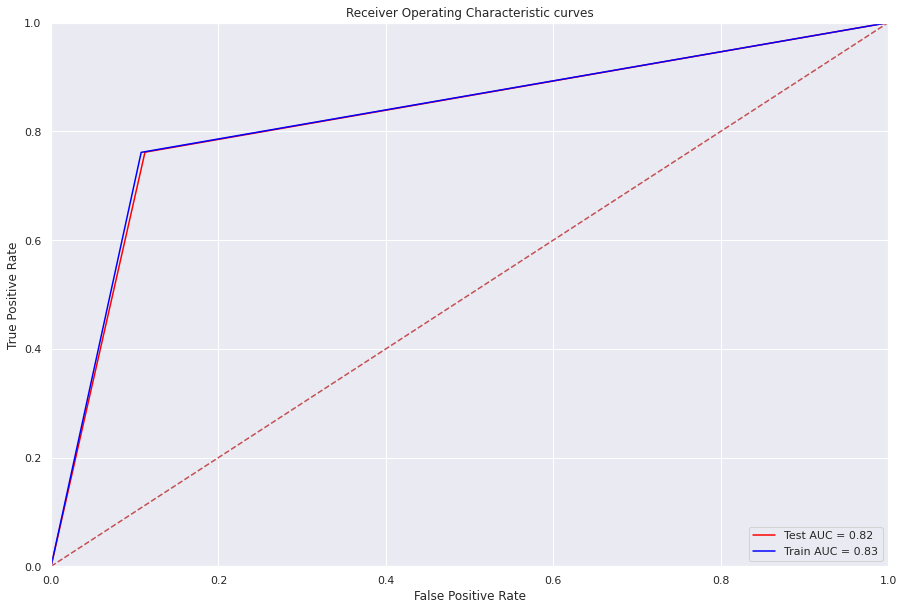

In [162]:
# Fit and evalute model with the help of self define function
svc_train_pred, svc_test_pred = matrix(svc_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

##<b> Decision Tree

In [163]:
# parametrs for decision tree
d_tree_params = {
    'max_depth': [10,],#2, 3, 5, 10, 20],
    'min_samples_leaf': [100,],#5, 10, 20, 50, 100],
    'criterion': ["entropy",],#"gini", ]
}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [164]:
# using grid search cv for hyperparameter tuning
dtree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_params,cv=5,verbose=True,n_jobs=-1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


============================== Training score ==============================


Training score  =  0.8127995642701525


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}
Best score  =   0.8041394335511981


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8127995642701525
Test Accuracy score =  0.819281045751634
Train Precision score =  0.8348269196977685
Test Precision score =  0.8418881759853346
Train Recall score =  0.7785546512263068
Test Recall score =  0.7912987292698687
Train F1 score =  0.8057094403617864
Test F1 score =  0.8158099256134118
Train ROC_AUC score =  0.8127009936737629
Test ROC_AUC score =  0.8196079275619786


============================== Metrices scores on Train and Test Set ==============================
            

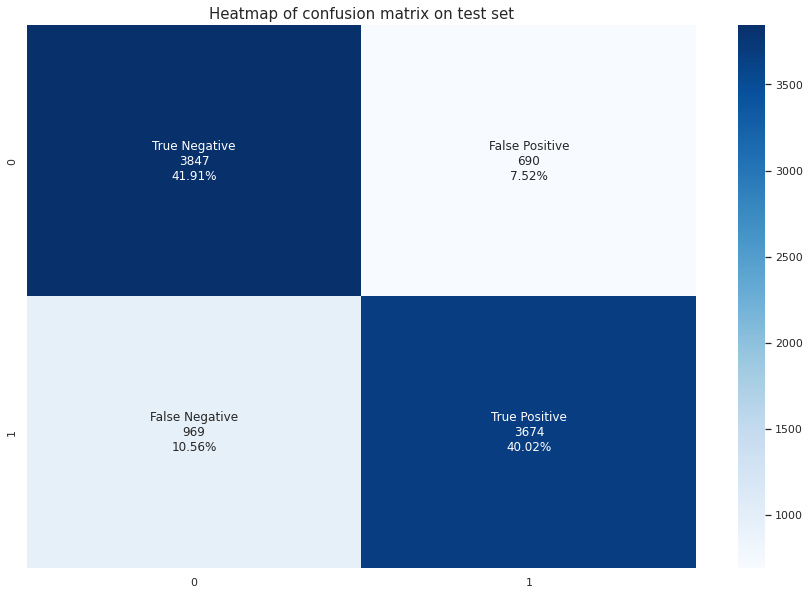



============================== Confusion Matrix on train set ==============================


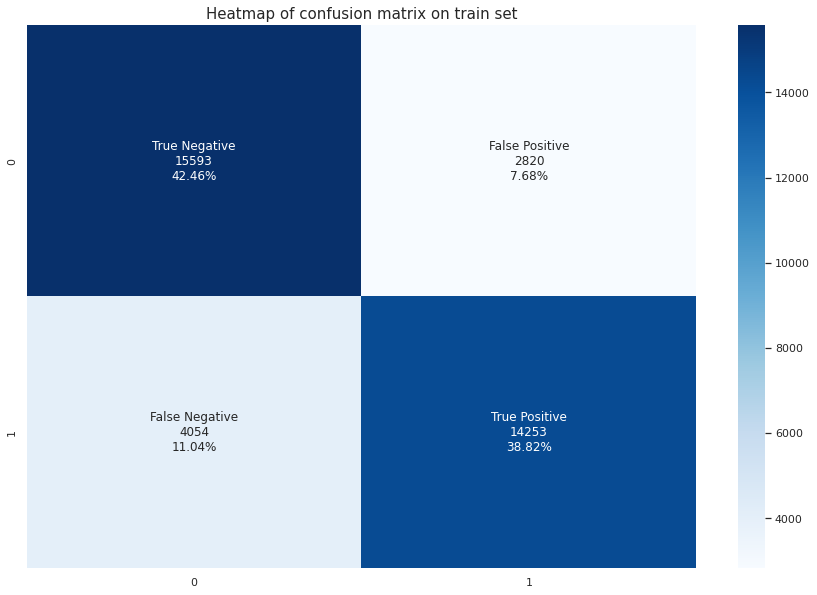



======================================== Top 10 Feature Importance ========================================


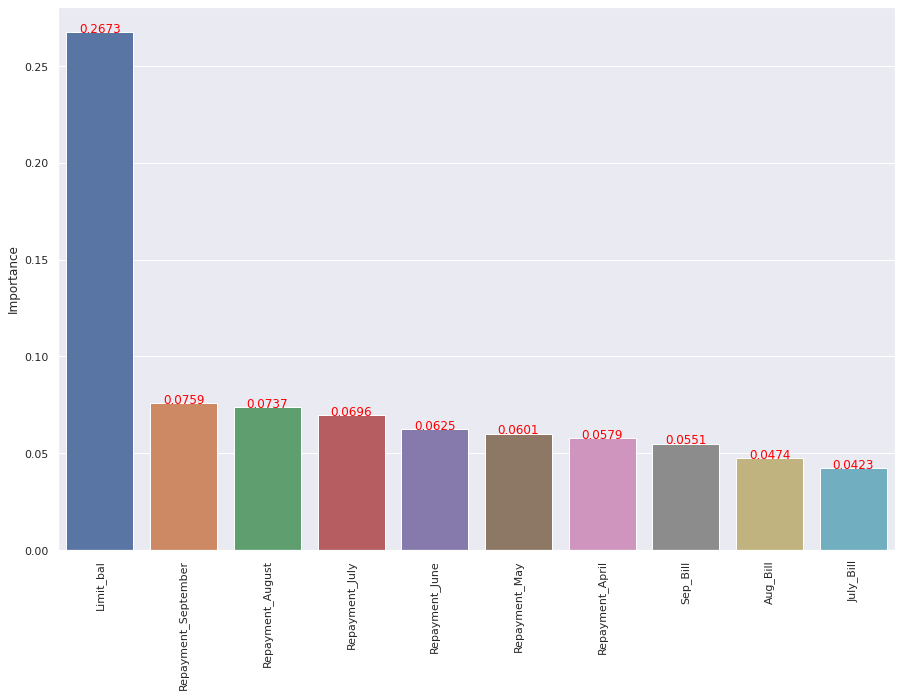

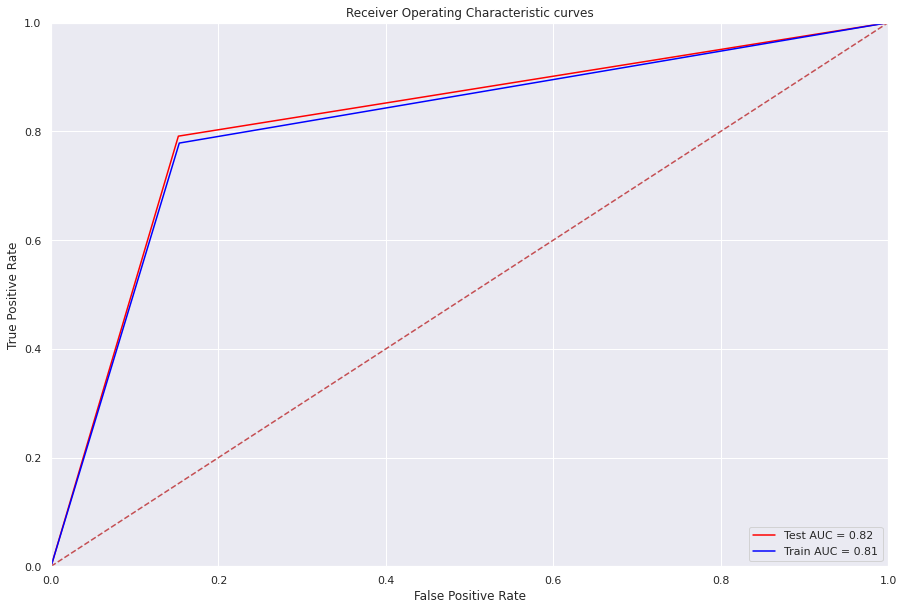

In [165]:
# Fit and evalute model with the help of self define function
dstree_train_pred, dstree_test_pred = matrix(dtree_grid,X_train_scaled,X_test_scaled,y_train,y_test)

In [166]:
# Visualizing Decision Tree Regressor
viz = dtreeviz(dtree_grid.best_estimator_,X_train_scaled,y_train, # Passing the model which is best in grid search and pass X_train and y_train
               target_name ='Rented Bike Count', #Dependent variable
               feature_names=X_train.columns, # Taking column names from X_train data frame 
               )
viz

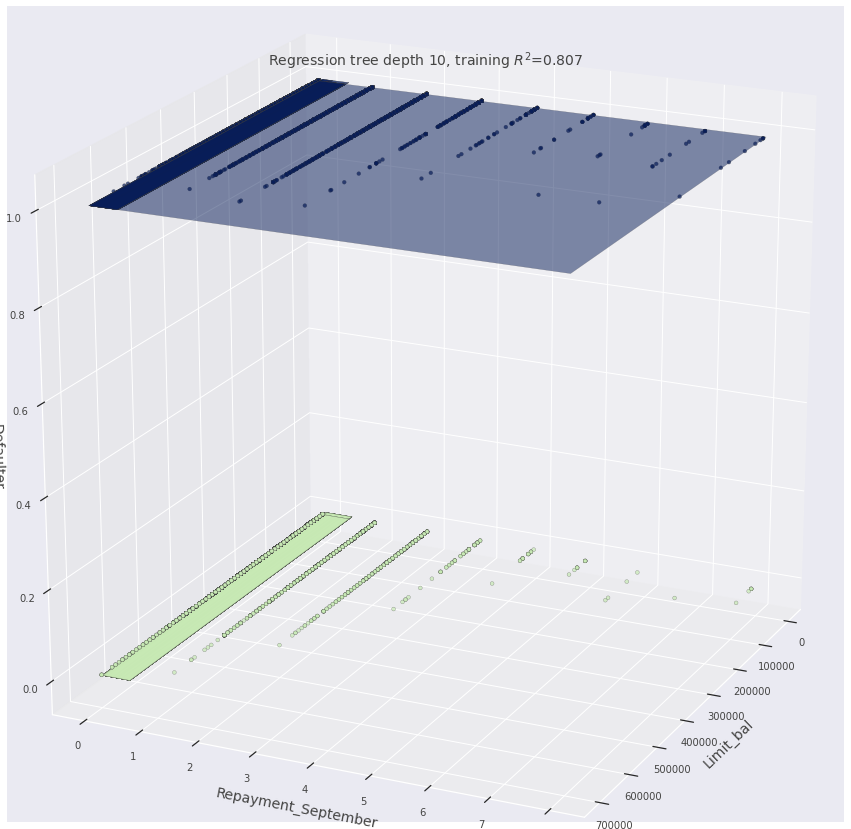

In [167]:
#import for 3D graph
from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *
# ploting the graph
figsize = (15,15)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dtree_grid.best_estimator_,
                      X_train, y_train,
                      feature_names=X.columns,
                      target_name='Defaulter',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()

##<b> Random Forest

In [168]:
# parameter for Random Forest
rf_params = {'n_estimators':[200],#100,300,250],
             'criterion':['gini'],#'entropy'],
              'min_samples_leaf':[8],#5,6,10]
              'max_depth' : [50],#,20,30,70],
              'min_samples_split': [10],#15,20,30]
              'max_features':['sqrt',]
              }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [169]:
# using grid search cv for hyperparameter tuning
rf_random = GridSearchCV(RandomForestClassifier(),rf_params,cv=5,scoring='recall',verbose=True,n_jobs=-1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


============================== Training score ==============================


Training score  =  0.8568307204894303


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 200}
Best score  =   0.7957609478687409


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8897331154684096
Test Accuracy score =  0.8479302832244009
Train Precision score =  0.9165595418955241
Test Precision score =  0.8787030557499417
Train Recall score =  0.8568307204894303
Test Recall score =  0.8113288821882404
Train F1 score =  0.8856892803704018
Test F1 score =  0.843673012318029
Train ROC_AUC score =  0.8896384091775343
Test ROC_AUC score =  0.8483578508362405


============================== Metrices scores 

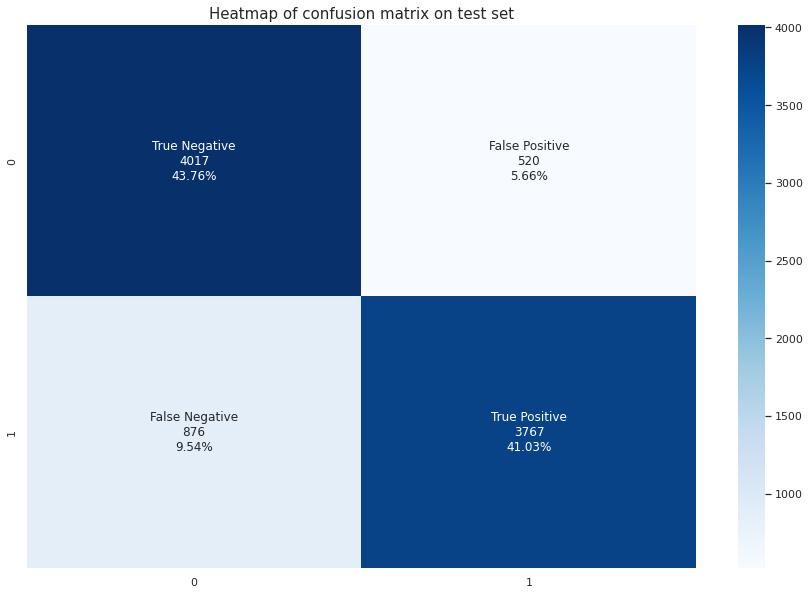



============================== Confusion Matrix on train set ==============================


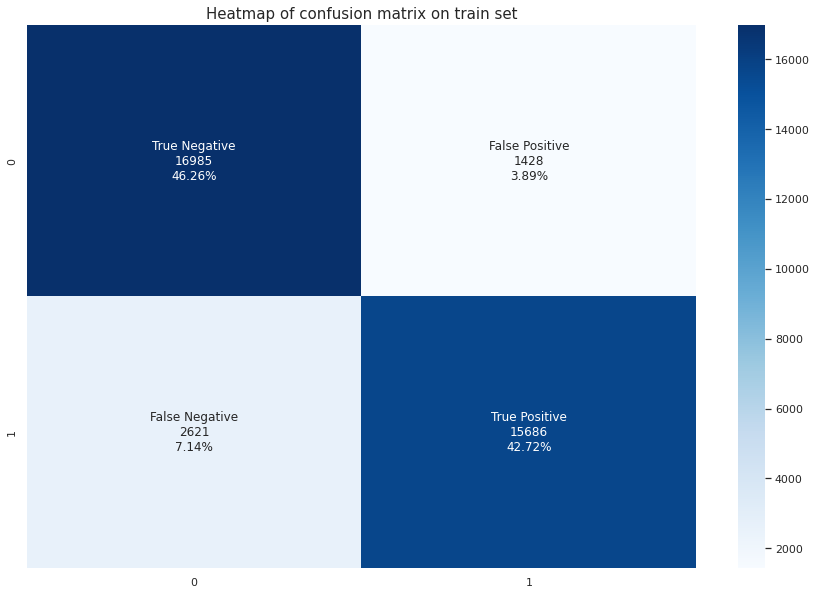



======================================== Top 10 Feature Importance ========================================


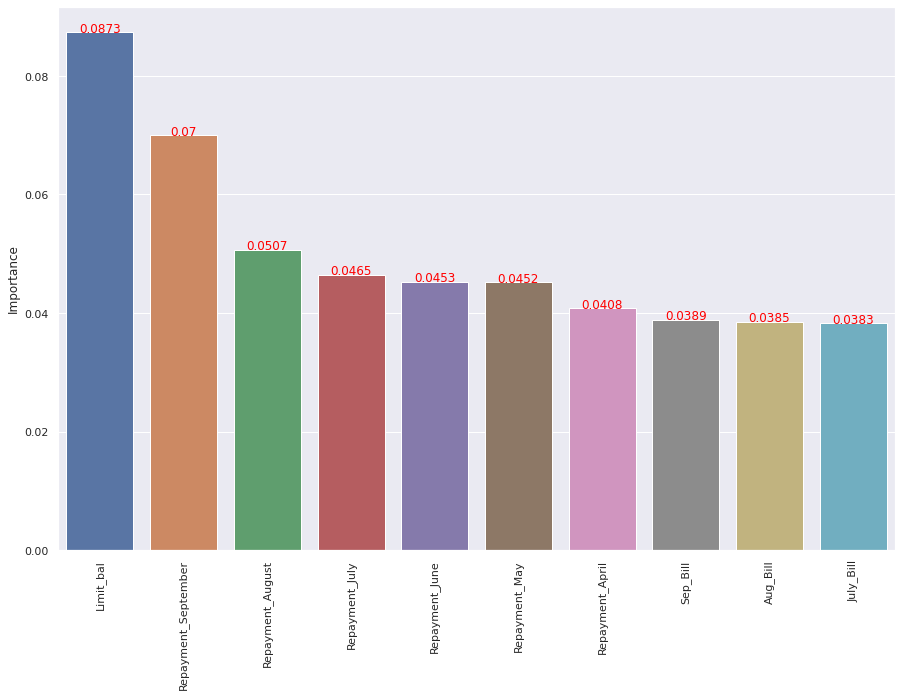

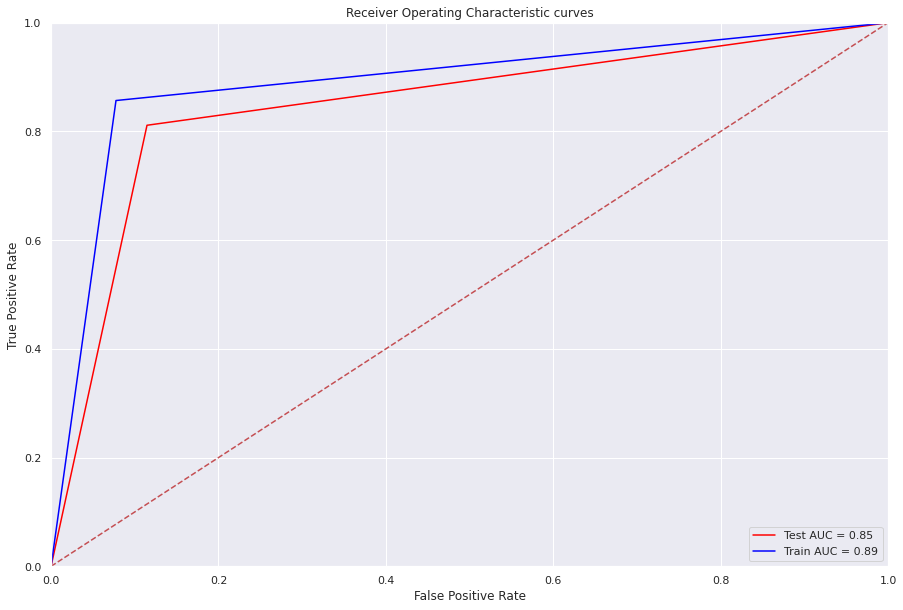

In [170]:
# Fit and evalute model with the help of self define function
rf_train_pred, rf_test_pred = matrix(rf_random,X_train_scaled,X_test_scaled,y_train,y_test)

In [171]:
# lime_explainibilty(rf_random.best_estimator_, 8,1)

In [172]:
# model_explainability_eli5(rf_random.best_estimator_,1)

##<b> Ada Boost Classifier

In [173]:
# parameter for AdaBoostClassifier
param_grid = {'n_estimators': [200],#50,100,150,200,300],
              'learning_rate':[1.0],#0.001,0.01,0.1],
              'algorithm':['SAMME.R'],#'SAMME',],
              }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [174]:
# using grid search cv for hyperparameter tuning
ada_boost_grid = GridSearchCV(AdaBoostClassifier(),param_grid,cv=5,scoring='recall',verbose=True,n_jobs=-1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


============================== Training score ==============================


Training score  =  0.7942863385590211


==================== Best Parameters and Best score ====================
best parameters  =   {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best score  =   0.7910085359564429


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8212418300653594
Test Accuracy score =  0.8226579520697168
Train Precision score =  0.8386296787588673
Test Precision score =  0.8402166553825322
Train Recall score =  0.7942863385590211
Test Recall score =  0.8018522506999785
Train F1 score =  0.8158559165123717
Test F1 score =  0.8205862905003307
Train ROC_AUC score =  0.8211642413481577
Test ROC_AUC score =  0.8229009986142607


============================== Metrices scores on Train and Test Set ==============================
          

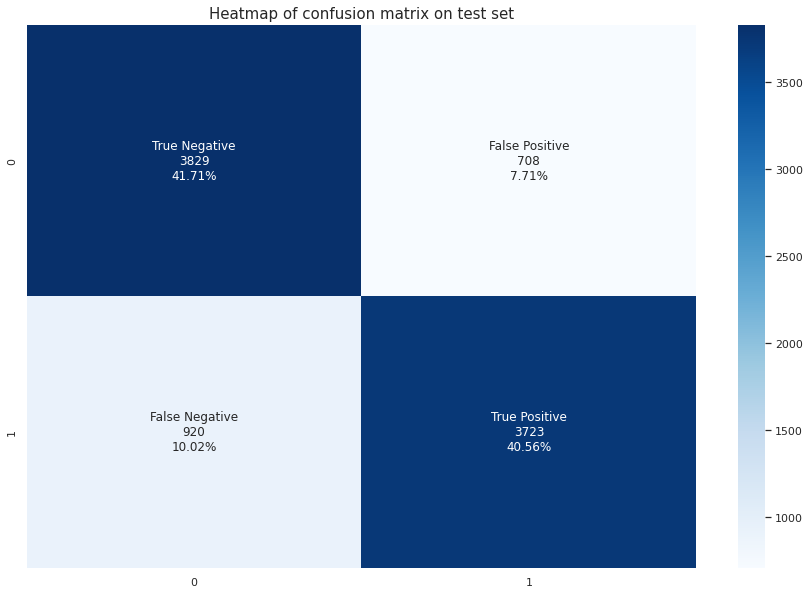



============================== Confusion Matrix on train set ==============================


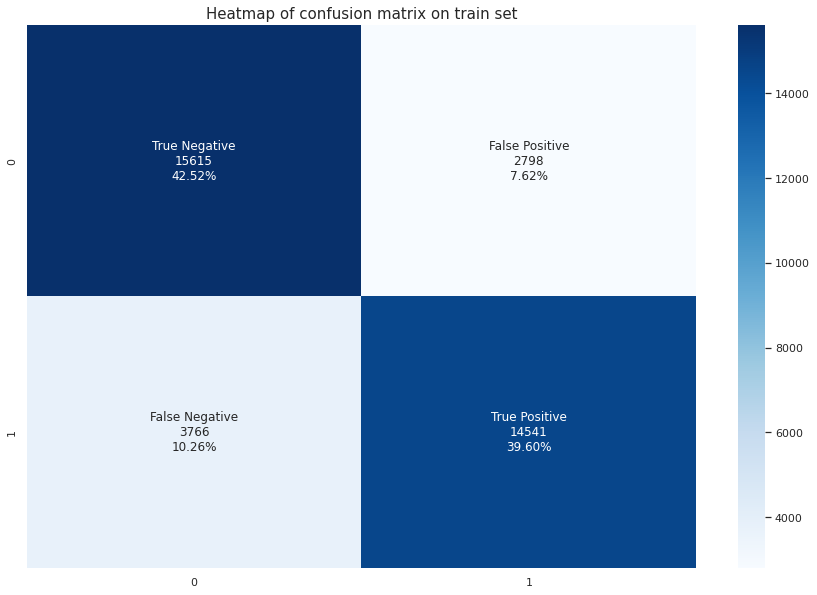



======================================== Top 10 Feature Importance ========================================


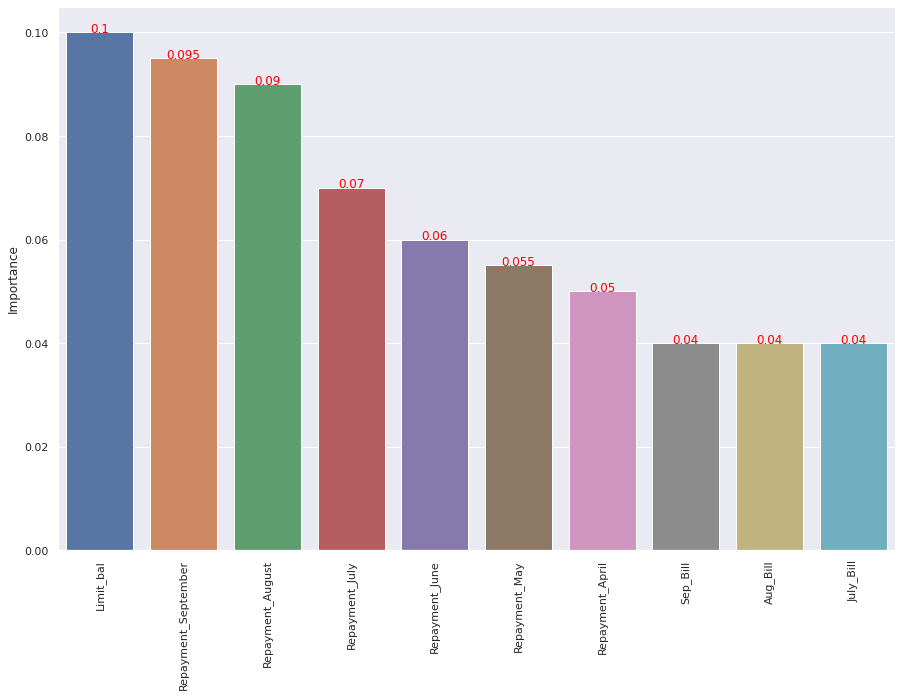

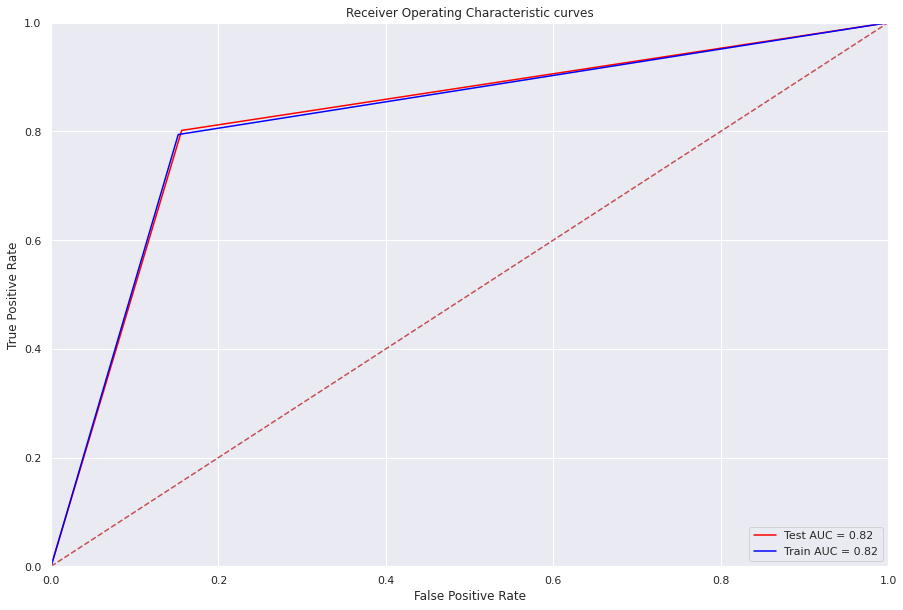

In [175]:
# Fit and evalute model with the help of self define function
ada_train_pred, ada_test_pred = matrix(ada_boost_grid,X_train_scaled,X_test_scaled,y_train,y_test)

##<b> Gradient Boosting

In [176]:
# parameter for Gradient Boosting
gb_params = {
    'max_depth': [17,],#10,15,20,25],
    'n_estimators': [300],#50,100,200,400,],
    'learning_rate': [0.005],#0.001,0.01,0.1,1.0],
    'min_samples_leaf':[20],#15,20,25],
    'min_samples_split':[65],#50,55,60,70],
  }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [177]:
# using grid search cv for hyperparameter tuning
gb_grid = GridSearchCV(GradientBoostingClassifier(),gb_params,cv=5,scoring='recall',verbose=4,n_jobs=-1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


============================== Training score ==============================


Training score  =  0.8569945922324794


==================== Best Parameters and Best score ====================
best parameters  =   {'learning_rate': 0.005, 'max_depth': 17, 'min_samples_leaf': 20, 'min_samples_split': 65, 'n_estimators': 300}
Best score  =   0.7916641840552648


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8957244008714597
Test Accuracy score =  0.8504357298474946
Train Precision score =  0.9283431952662722
Test Precision score =  0.8843441466854725
Train Recall score =  0.8569945922324794
Test Recall score =  0.8102519922463924
Train F1 score =  0.8912432186781037
Test F1 score =  0.8456783185343374
Train ROC_AUC score =  0.8956129209465227
Test ROC_AUC score =  0.8509051453407408


============================== Metrices scores on Train and Test S

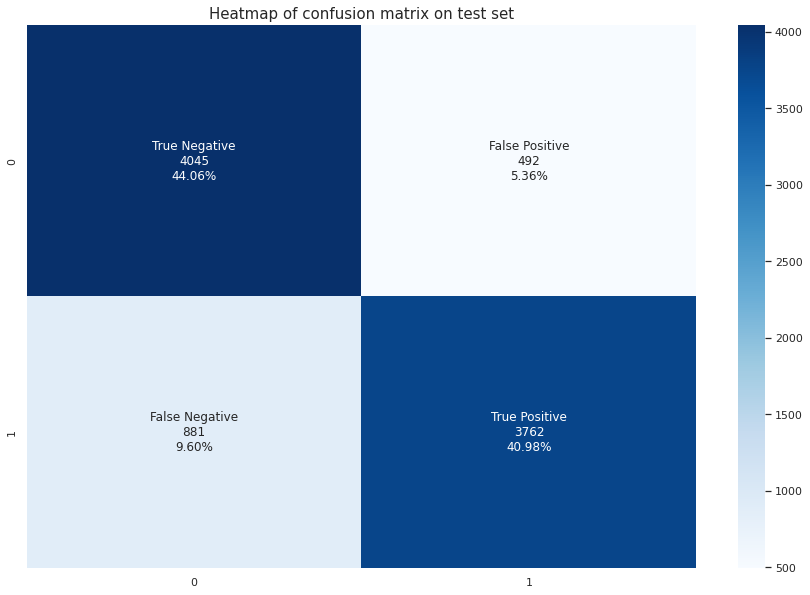



============================== Confusion Matrix on train set ==============================


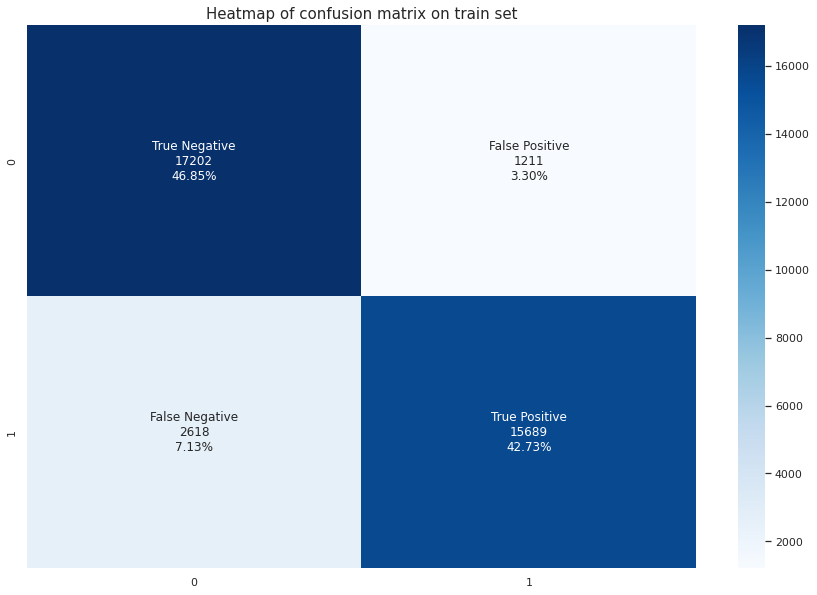



======================================== Top 10 Feature Importance ========================================


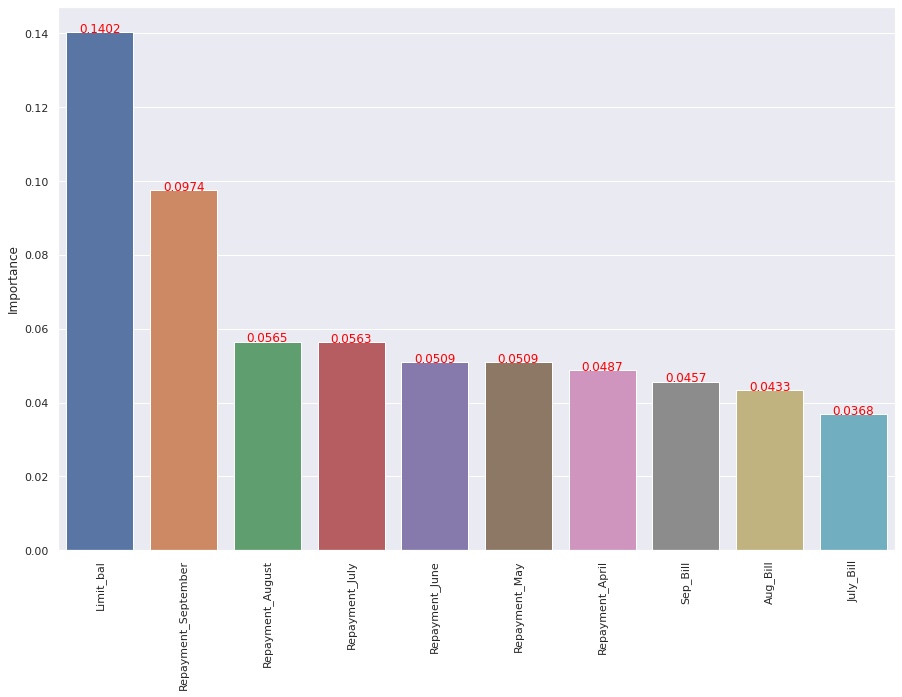

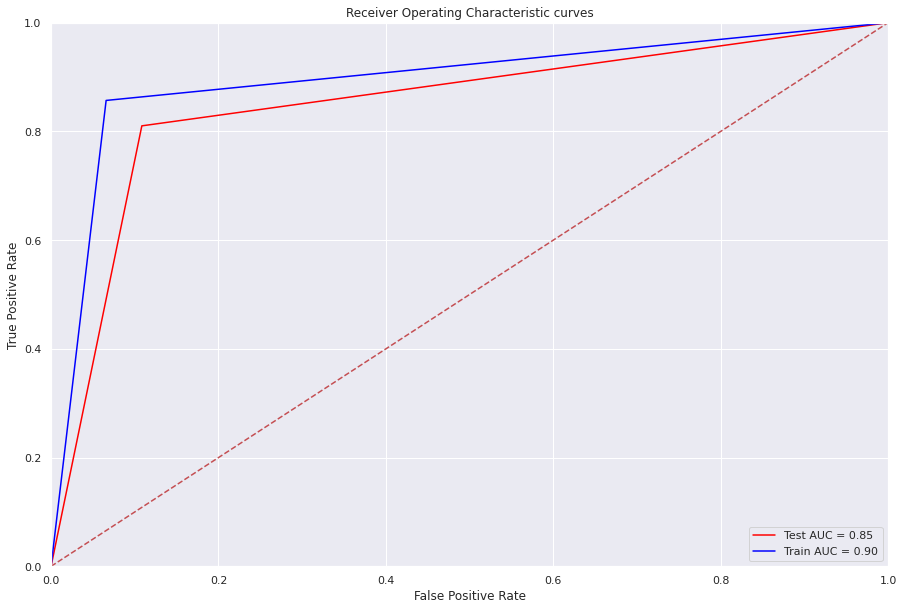

In [178]:
# Fit and evalute model with the help of self define function
gb_train_pred, gb_test_pred =matrix(gb_grid,X_train_scaled,X_test_scaled,y_train,y_test)

##<b> Extreme Gradient Boosting

In [179]:
# parameters for Extreme Gradient Boosting
xgb_params = {
          'subsample': [0.5],#0.3,0.7], 
          'n_thread': [4], #2,6],
          'n_estimators': [1000],#range(200,1500,50), 
          'min_child_weight': [2],#3,5], 
          'max_depth': [4],#range(2,8,2), 
          'learning_rate': [0.02],#0.04,0.06], 
          'eval_mertric': ['rmse'],#'mse',], 
          'colsample_bytree': [0.7],#0.5,1.0],  
          }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [180]:
# using grid search cv for hyperparameter tuning
xgb_grid_search= GridSearchCV(XGBClassifier(silent=True),param_grid=xgb_params,cv=5,n_jobs=-1)



============================== Training score ==============================


Training score  =  0.8491557734204793


==================== Best Parameters and Best score ====================
best parameters  =   {'colsample_bytree': 0.7, 'eval_mertric': 'rmse', 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 1000, 'n_thread': 4, 'subsample': 0.5}
Best score  =   0.8374455337690632


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8491557734204793
Test Accuracy score =  0.8444444444444444
Train Precision score =  0.8754410726887791
Test Precision score =  0.8709900761597046
Train Recall score =  0.8131315890096684
Test Recall score =  0.8128365281068275
Train F1 score =  0.8431366996120189
Test F1 score =  0.8409090909090908
Train ROC_AUC score =  0.849052081367377
Test ROC_AUC score =  0.8448136795261931


============================== Metrices scores on Train and Test Set ==

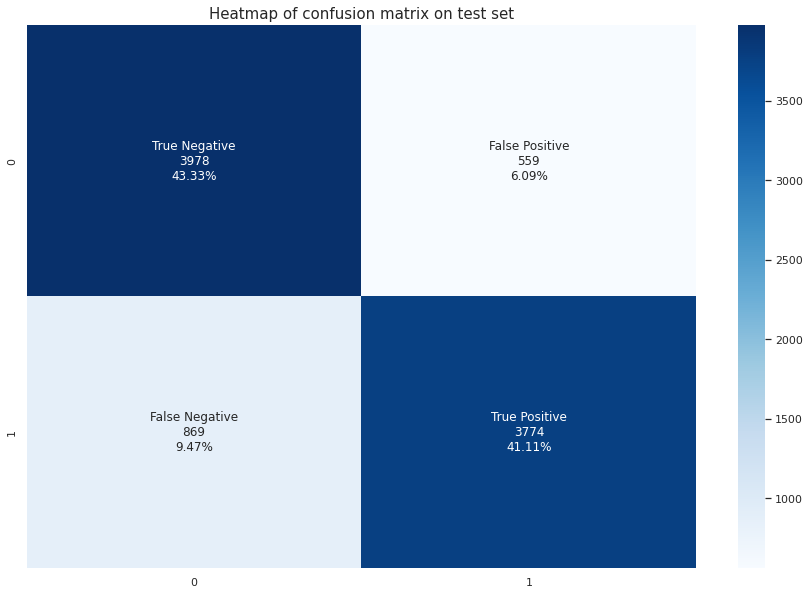



============================== Confusion Matrix on train set ==============================


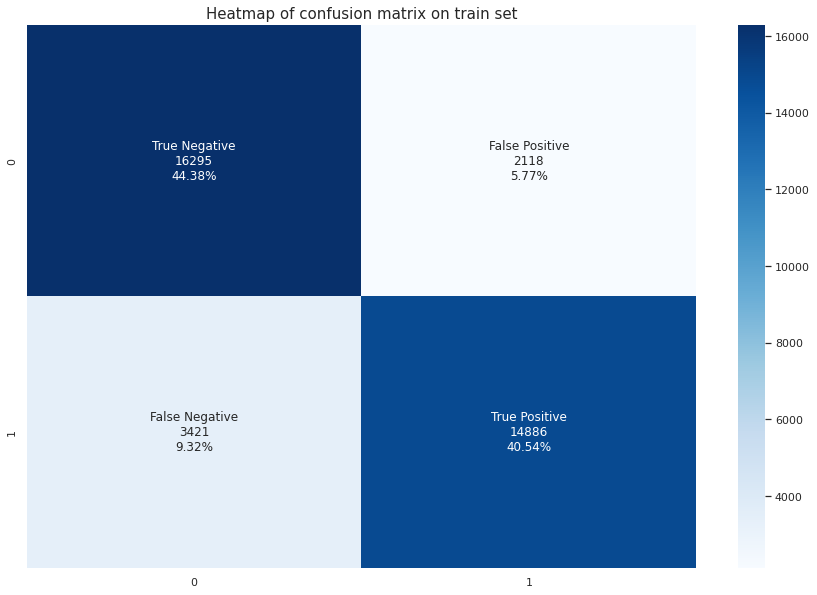



======================================== Top 10 Feature Importance ========================================


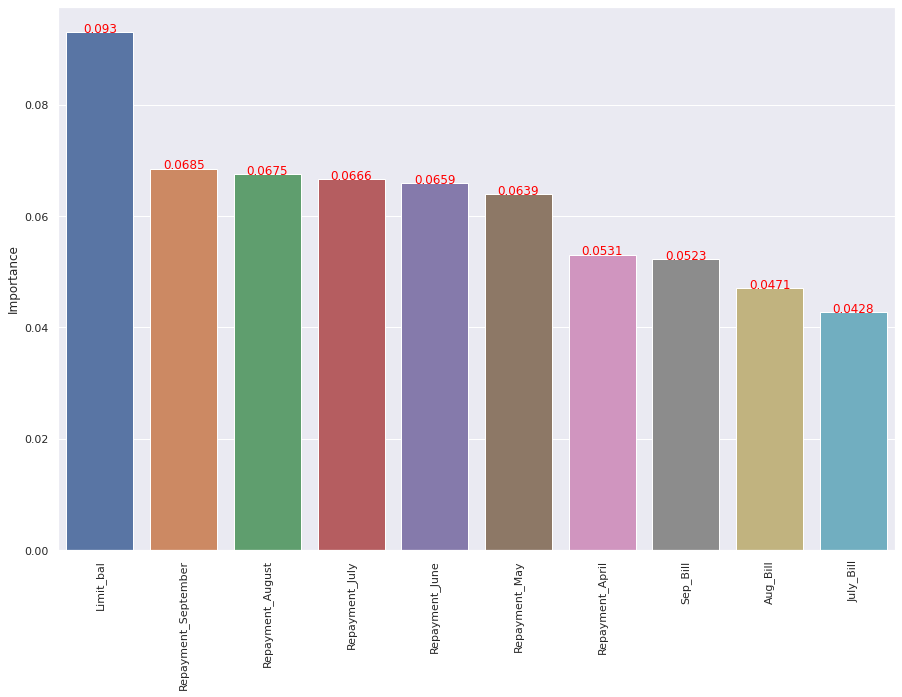

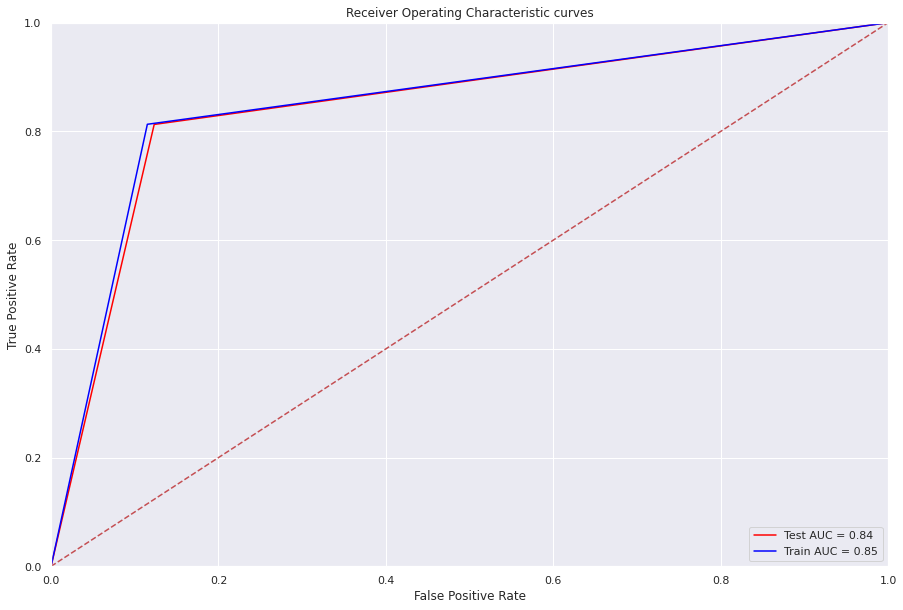

In [181]:
# Fit and evalute model with the help of self define function
xgb_train_pred, xgb_test_pred = matrix(xgb_grid_search,X_train_scaled,X_test_scaled,y_train,y_test)

##<b>Stacking Classifier

In [182]:
# import stacking regressor from sklearn ensemble
from sklearn.ensemble import StackingClassifier

In [183]:
# Base Estimators 
estimators = [('lr',logistic_grid_search.best_estimator_),('sgd',sgd_grid.best_estimator_),
              ('svc',svc_grid.best_estimator_),('dt',dtree_grid.best_estimator_),('rf',rf_random.best_estimator_),
       ('ada_boost',ada_boost_grid.best_estimator_),('gb',gb_grid.best_estimator_),
       ]

In [184]:
# In FInal estimator we use Gradient Boosting Regressor
final_estimator = xgb_grid_search.best_estimator_

In [185]:
# creating a variable for StackingRegressor
stacking=StackingClassifier(estimators=estimators,final_estimator=final_estimator,passthrough=True,n_jobs=-1)



============================== Training score ==============================


Training score  =  0.9213235294117647


==================== Best Parameters and Best score ====================


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.9213235294117647
Test Accuracy score =  0.8622004357298475
Train Precision score =  0.9497666277712952
Test Precision score =  0.8966651009863785
Train Recall score =  0.8892227016988037
Test Recall score =  0.8223131595950893
Train F1 score =  0.918498039326318
Test F1 score =  0.8578811369509044
Train ROC_AUC score =  0.9212311303530133
Test ROC_AUC score =  0.8626663880408773


============================== Metrices scores on Train and Test Set ==============================
              precision    recall  f1-score   support

     class 0       0.83      0.90      0.87      4537
     class 1       0.90      0.82      0.86      4643

    accuracy                  

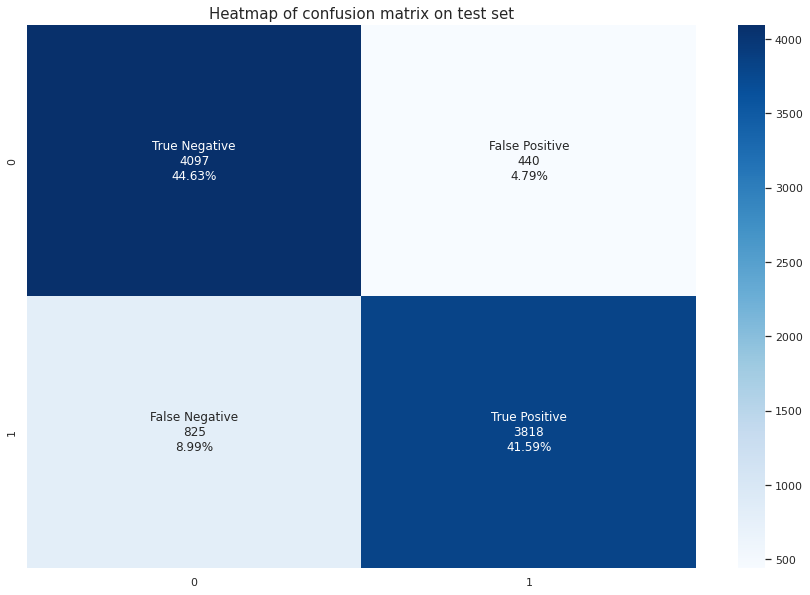



============================== Confusion Matrix on train set ==============================


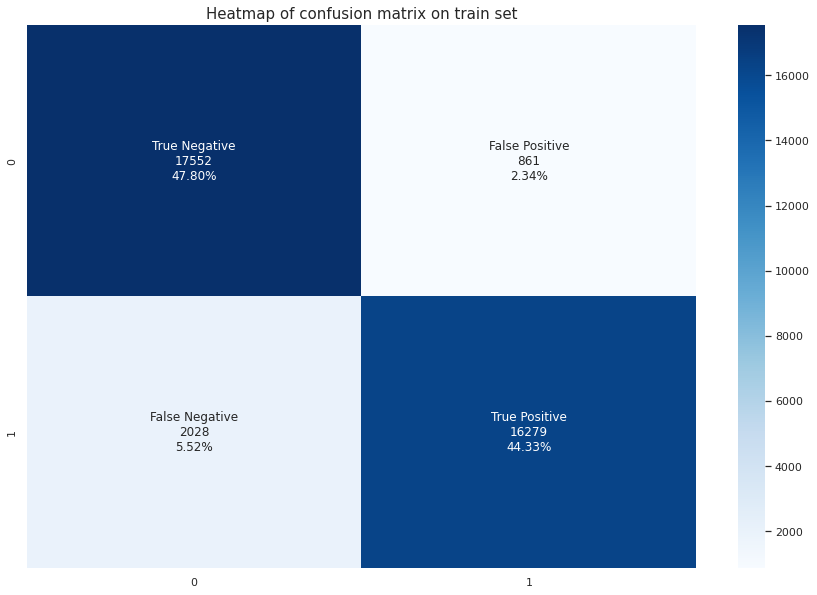



======================================== Top 10 Feature Importance ========================================


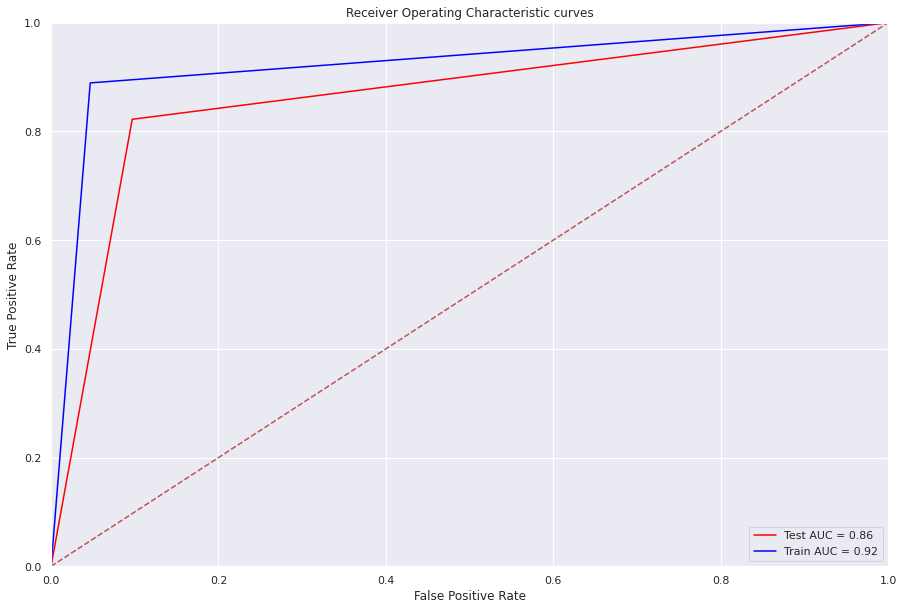

In [186]:
stacking_train_pred, stacking_test_pred = matrix(stacking,X_train_scaled,X_test_scaled,y_train,y_test)

#<b> Final matrix Dataframe

In [197]:
#creating final matrices dataframe and ascending with highest recall score
final_matrix_df=pd.DataFrame(list(zip(train_accuracy_score,test_accuracy_score,train_precision_score,test_precision_score,
                                 train_recall_score,test_recall_score,train_f1_score,test_f1_score,train_roc_score,test_roc_score )),
                        index=['Logistic Regression', 'Stochastic Gradient Descent', 'Support Vector Classifier',
                               'Decision Tree','Random Forest','Ada Boost Classifier','Gradient Boosting','Extreme Gradient Boosting','Stacking Classifier'],
                        columns=['Train accuracy score','Test accuracy score','Train precision score','Test precision score',
                                 'Train recall score','Test recall score','Train f1 score','Test f1 score','Train roc score','Test roc score']).sort_values("Test recall score",ascending=False)

In [ ]:
final_matrix_df

#<b>ROC curve for all the models

In [202]:
logistic=logistic_grid_search.best_estimator_
sgd = sgd_grid.best_estimator_
svc = svc_grid.best_estimator_
dt = dtree_grid.best_estimator_
rf = rf_random.best_estimator_
ada_boost = ada_boost_grid.best_estimator_
gb=gb_grid.best_estimator_
xgb = xgb_grid_search.best_estimator_
stacking = stacking

In [212]:
y_preds_proba_lr = logistic.predict_proba(X_test_scaled)[::,1]
# y_preds_proba_sgd = sgd.predict_proba(X_test_scaled)[::,1]
# y_preds_proba_svc = svc.predict_proba(X_test_scaled)[::,1]
y_preds_proba_dt = dt.predict_proba(X_test_scaled)[::,1]
y_preds_proba_rf = rf.predict_proba(X_test_scaled)[::,1]
y_preds_proba_ada = ada_boost.predict_proba(X_test_scaled)[::,1]
y_preds_proba_xgb = xgb.predict_proba(X_test_scaled)[::,1]
y_preds_proba_stack = stacking.predict_proba(X_test_scaled)[::,1]

In [214]:
y_preds_proba_gb = gb.predict_proba(X_test_scaled)[::,1]

In [215]:
classifiers_proba = [(logistic, y_preds_proba_lr), 
                    # (sgd, y_preds_proba_sgd), 
                    # (svc, y_preds_proba_svc),
                    (dt, y_preds_proba_dt),
                    (rf, y_preds_proba_rf),
                    (ada_boost, y_preds_proba_ada),
                    (gb, y_preds_proba_gb),
                    (xgb, y_preds_proba_xgb),
                     (stacking, y_preds_proba_stack),
                    
                    ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

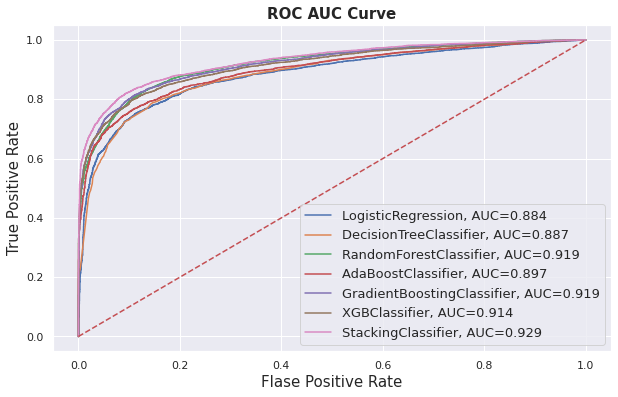

In [216]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [230]:
df.columns

Index(['Limit_bal', 'Gender', 'Education', 'Marital_status',
       'Repayment_September', 'Repayment_August', 'Repayment_July',
       'Repayment_June', 'Repayment_May', 'Repayment_April', 'Sep_Bill',
       'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill', 'Pay_Sep',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April', 'Defaulter',
       'Age_group'],
      dtype='object')

#<b> Pipeline

In [364]:
df.head()

Limit_bal  Gender  Education  ...  Pay_May  Pay_April  Defaulter
0      20000       1          1  ...        0          0          1
1     120000       1          1  ...        0       2000          1
2      90000       1          1  ...     1000       5000          0
3      50000       1          1  ...     1069       1000          0
4      50000       2          1  ...      689        679          0

[5 rows x 24 columns]

In [358]:
df['Marital_status'].unique()

array(['married', 'single', 'others'], dtype=object)

In [359]:
df['Gender']=df['Gender'].apply(lambda x : 1 if x=='Female' else 2)

In [360]:
df['Education']=df['Education'].apply(lambda x : 1 if x=='university' else (2 if x=='graduate' else (3 if x=='high school' else 0)))

In [361]:
df['Marital_status']=df['Marital_status'].apply(lambda x : 1 if x=='married' else (2 if x=='single' else 0))

In [363]:
df.drop(columns=['Age_group'],inplace=True)

In [365]:
X =df.drop(columns=['Defaulter'])
y =df['Defaulter']

In [366]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29503
Resampled dataset shape 45900


In [368]:
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [242]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [369]:
# Scaling
scaling = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,33))
])

In [370]:
stack_model = stacking

In [371]:
pipe = make_pipeline(scaling,stack_model)

In [372]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 33, None))])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('lr',
                                                 LogisticRegression(C=10,
                                                                    class_weight='balanced')),
                                                ('sgd',
                                                 SGDClassifier(alpha=0.001,
                                                               class_weight='balanced',
                                                               max_iter=1500,
                                                               penalty='l1')),
                                                ('svc', SVC(C=5)),
                                                ('dt',
                                                 De

In [373]:
pred=pipe.predict(X_test)

In [375]:
accuracy_score(y_test,pred)

0.8278867102396514

In [376]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))